<h1><center> Process Signal Formation </center></h1>

Last Modified: By Daniel Baur on 10th February 2019

This jupyter notebook is used to further process and analyze the Signal Formation (SF.py) output.

### Table of Contents


0. **[Stuff](#0.-Stuff)**<br>
    0.1 [Imports](#0.1-Imports)<br>
    0.2 [Definitions](#0.2-Definitions)<br>
    0.3 [Documentation](#0.3-Documentation)


1. **[First Tests](#1.-First-Tests)**<br>
    1.1 [Proof of Principle Plots](#0.1-Proof-of-Principle-Plots)<br>
    1.2 [Distribution of Primary Quanta](#1.2-Distribution-of-Primary-Quanta)<br>
    1.3 [When Does the Number of Primary Quanta Exceed a Certain Threshold (for Julia)?](#1.3-When-Does-the-Number-of-Primary-Quanta-Exceed-a-Certain-Threshold-(for-Julia)?)<br>
    1.4 [S1S2 Ellipse (for Robin)](#1.4-S1S2-Ellipse-(for-Robin))<br>
    1.5 [WIMP Recoil Spectra](#1.5-WIMP-Recoil-Spectra)<br>
    1.6 [Reproducing NEST Benchmark Plots for Fabian](#1.6-Reproducing-NEST-Benchmark-Plots-for-Fabian)



# 0. Stuff

## 0.1 Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.special import binom as binomcoeff
from scipy.optimize import curve_fit
from scipy.integrate import quad
import datetime
import pprint
import math
import os
from matplotlib.ticker import AutoMinorLocator
import subprocess
import json
import SF
import SF_spectrum
import SF_process
import SF_nestcom

## 0.2 Definitions

In [2]:
path_input_detectors = SF.path_input_detectors
path_input_spectra = SF.path_input_spectra
path_output_sf = SF.path_output_sf
path_output_psf = SF.path_output_psf
path_testnest = SF.path_testnest

darwin_blue = '#004A9B'

## 0.3 Documentation
(As the documentation is written in Markdown format the cell below is used write and display the documentation code. In the finalized version this cell will be removed - it is in no way shape or form relevant for the functionality of the SFS program.)


<h1><center> Signal Formation Simulation </center></h1>
<br>
<br>
<br>

Last Modified: By Daniel Baur on 20th November 2019

Signal Formation Simulation (SFS) is a Python (Python3) script meant process (arbitrary/MC/WIMP/etc...) recoil spectra (i.e. either generated manually or via MC simulations) into the S1/S2 signature within a LXe TPC detector such as DARWIN (in PE/phd) utilizing NEST (NESTv2.0). It consists of three main components:
* Master Signal Formation (MSF.py): coordinate the SF instance
* Signal Formation (SF.py): main code, process specified spectra within a specified detector using NEST
* Process Signal Formation (PSF.ipynb): analyse the data generated with SF
<br>
<br>

### Table of Contents

0. **[Setup](#0.-Setup)**<br>
    0.1 [NEST](#0.1-NEST)<br>
    0.2 [SFS](#0.2-SFS)


1. **[Introduction](#1.-Introduction)**<br>


2. **[Usage](#2.-Usage)**<br>
    2.1 [Detector Modification](#2.1-Detector-Modification)<br>
    2.2 [Spectra Generation](#2.2-Spectra-Generation)<br>
    2.3 [Postprocessing](#2.3-Postprocessing)


3. **[Troubleshooting](#3.-Troubleshooting)**<br>

<br>
<br>
<br>

# 0. Setup

Stuffedistuffstuff

<br>

## 0.1 NEST

NEST (Noble Element Simulation Technique) is a simulation tool for scintillation, ionization and electroluminescence processes. Its main applications are various simulation capabilities for experimental dark matter searches. The working principle is based on parameterizing expressions for physical quantities (e.g. charge yield, relative scintillation efficiency, etcg.) based on current experimental results. The code is written in C++ and maintained by the NEST collaboration (see: [--> the official NEST website <--](http://nest.physics.ucdavis.edu/)). SFS is essentially a framework so NEST can be used to automatically process arbitrary recoil spectra.

For the installation check out [--> the NEST repository on GitHub <--](https://github.com/NESTCollaboration/nest) allong with [--> the documentation on GitHub <--](https://github.com/NESTCollaboration/nest/blob/master/README.md).

First create a new directory (e.g. `NEST`) and within that git clone the repository:

`$ git clone https://personal_username@github.com/NESTCollaboration/nest.git`

For me:

`$ git clone https://DanielBaur@github.com/NESTCollaboration/nest.git`

Then create the `build` and `install` directories - but make sure they are on the same level as the `nest` directory. I.e. from within the git cloned `nest` directory execute

`$ mkdir ../build; mkdir ../install; cd ../build`

Accordingly instead of executing the command

`$ cmake -DCMAKE_INSTALL_PREFIX=[path to install directory] ../relative/path/nest`

,that is executed from the `build` directory, boils down to

`$ cmake -DCMAKE_INSTALL_PREFIX=./../install ../nest`   .

And finally execute the following within the build directory:

`$ make; make install`

<br>

## 0.2 SFS

Download the program from [--> the SFS GitHub repository <--](https://github.com/DanielBaur/SFS) by executing

`$ git clone https://github.com/DanielBaur/SFS.git`

within your target folder. All you still need to do is to enter the path to your instance of the `testNEST` executable in `SF.py`. The `testNEST` executable should be in the `install` folder within your instance of NEST; i.e. change the following line in `SF.py`

`# ---> Insert the path to your testNEST executable here! <---
path_testnest = "/scratch/db1086/NEST2/install/"`

to e.g. 

`# ---> Insert the path to your testNEST executable here! <---
path_testnest = "/wherever/you/installed/NEST/install/"`  .


<br>
<br>
<br>
<br>

# 1. Introduction

<br>
<br>
<br>
<br>

# 2. Usage

Execute the `SF.py` file by

`$ Python3 SF.py -d <detectorname> -s <spectrumname>` .

The detector specified by `<detectorname>` (in the `input_detecotrs` folder) is implemented in NEST and afterwards the spectrum specified by `<spectrumname>` (in the `input_spectra`) is forwarded and processed by NEST. The output is stored in the `output_sf` folder.

<br>

## 2.1 Detector Modification

In NEST a detector is specified by modifying the `Detector.hh` and implementing it into the NEST source code. The `SF.py` code does that automatically: In the `input_detectors` folder just generate a new detector file from the `detector_template.txt` file, edit the parameters therein and forward its (altered and unique (!)) name to the `SF.py` call (see above) as the `<detectorname>` flag.

<br>

## 2.2 Spectra Generation

Processing some arbitrary spectrum in NEST 

<br>

## 2.3 Posprocessing

<br>
<br>
<br>
<br>

# 3. Troubleshooting

Please note that the SFS script was neither conceptualized specifically for the DARWIN collaboration nor the broad public. It was developed for my personal work in the context of my Ph.D. studies. Accordingly all credit should be adressed directly towards the NEST collaboration (please also note the appropriate citation on [--> the documentation on GitHub <--](https://github.com/NESTCollaboration/nest/blob/master/README.md)). Also I cannot guarantee a fully functional program in any way, shape or form. For bug reports, general questions or other suggestions please contact me directly via email: <daniel.baur@physik.uni-freiburg.de>.


# 1. First Tests

## 1.1 Primary Quanta for Specific Energy Depositions

#### ER

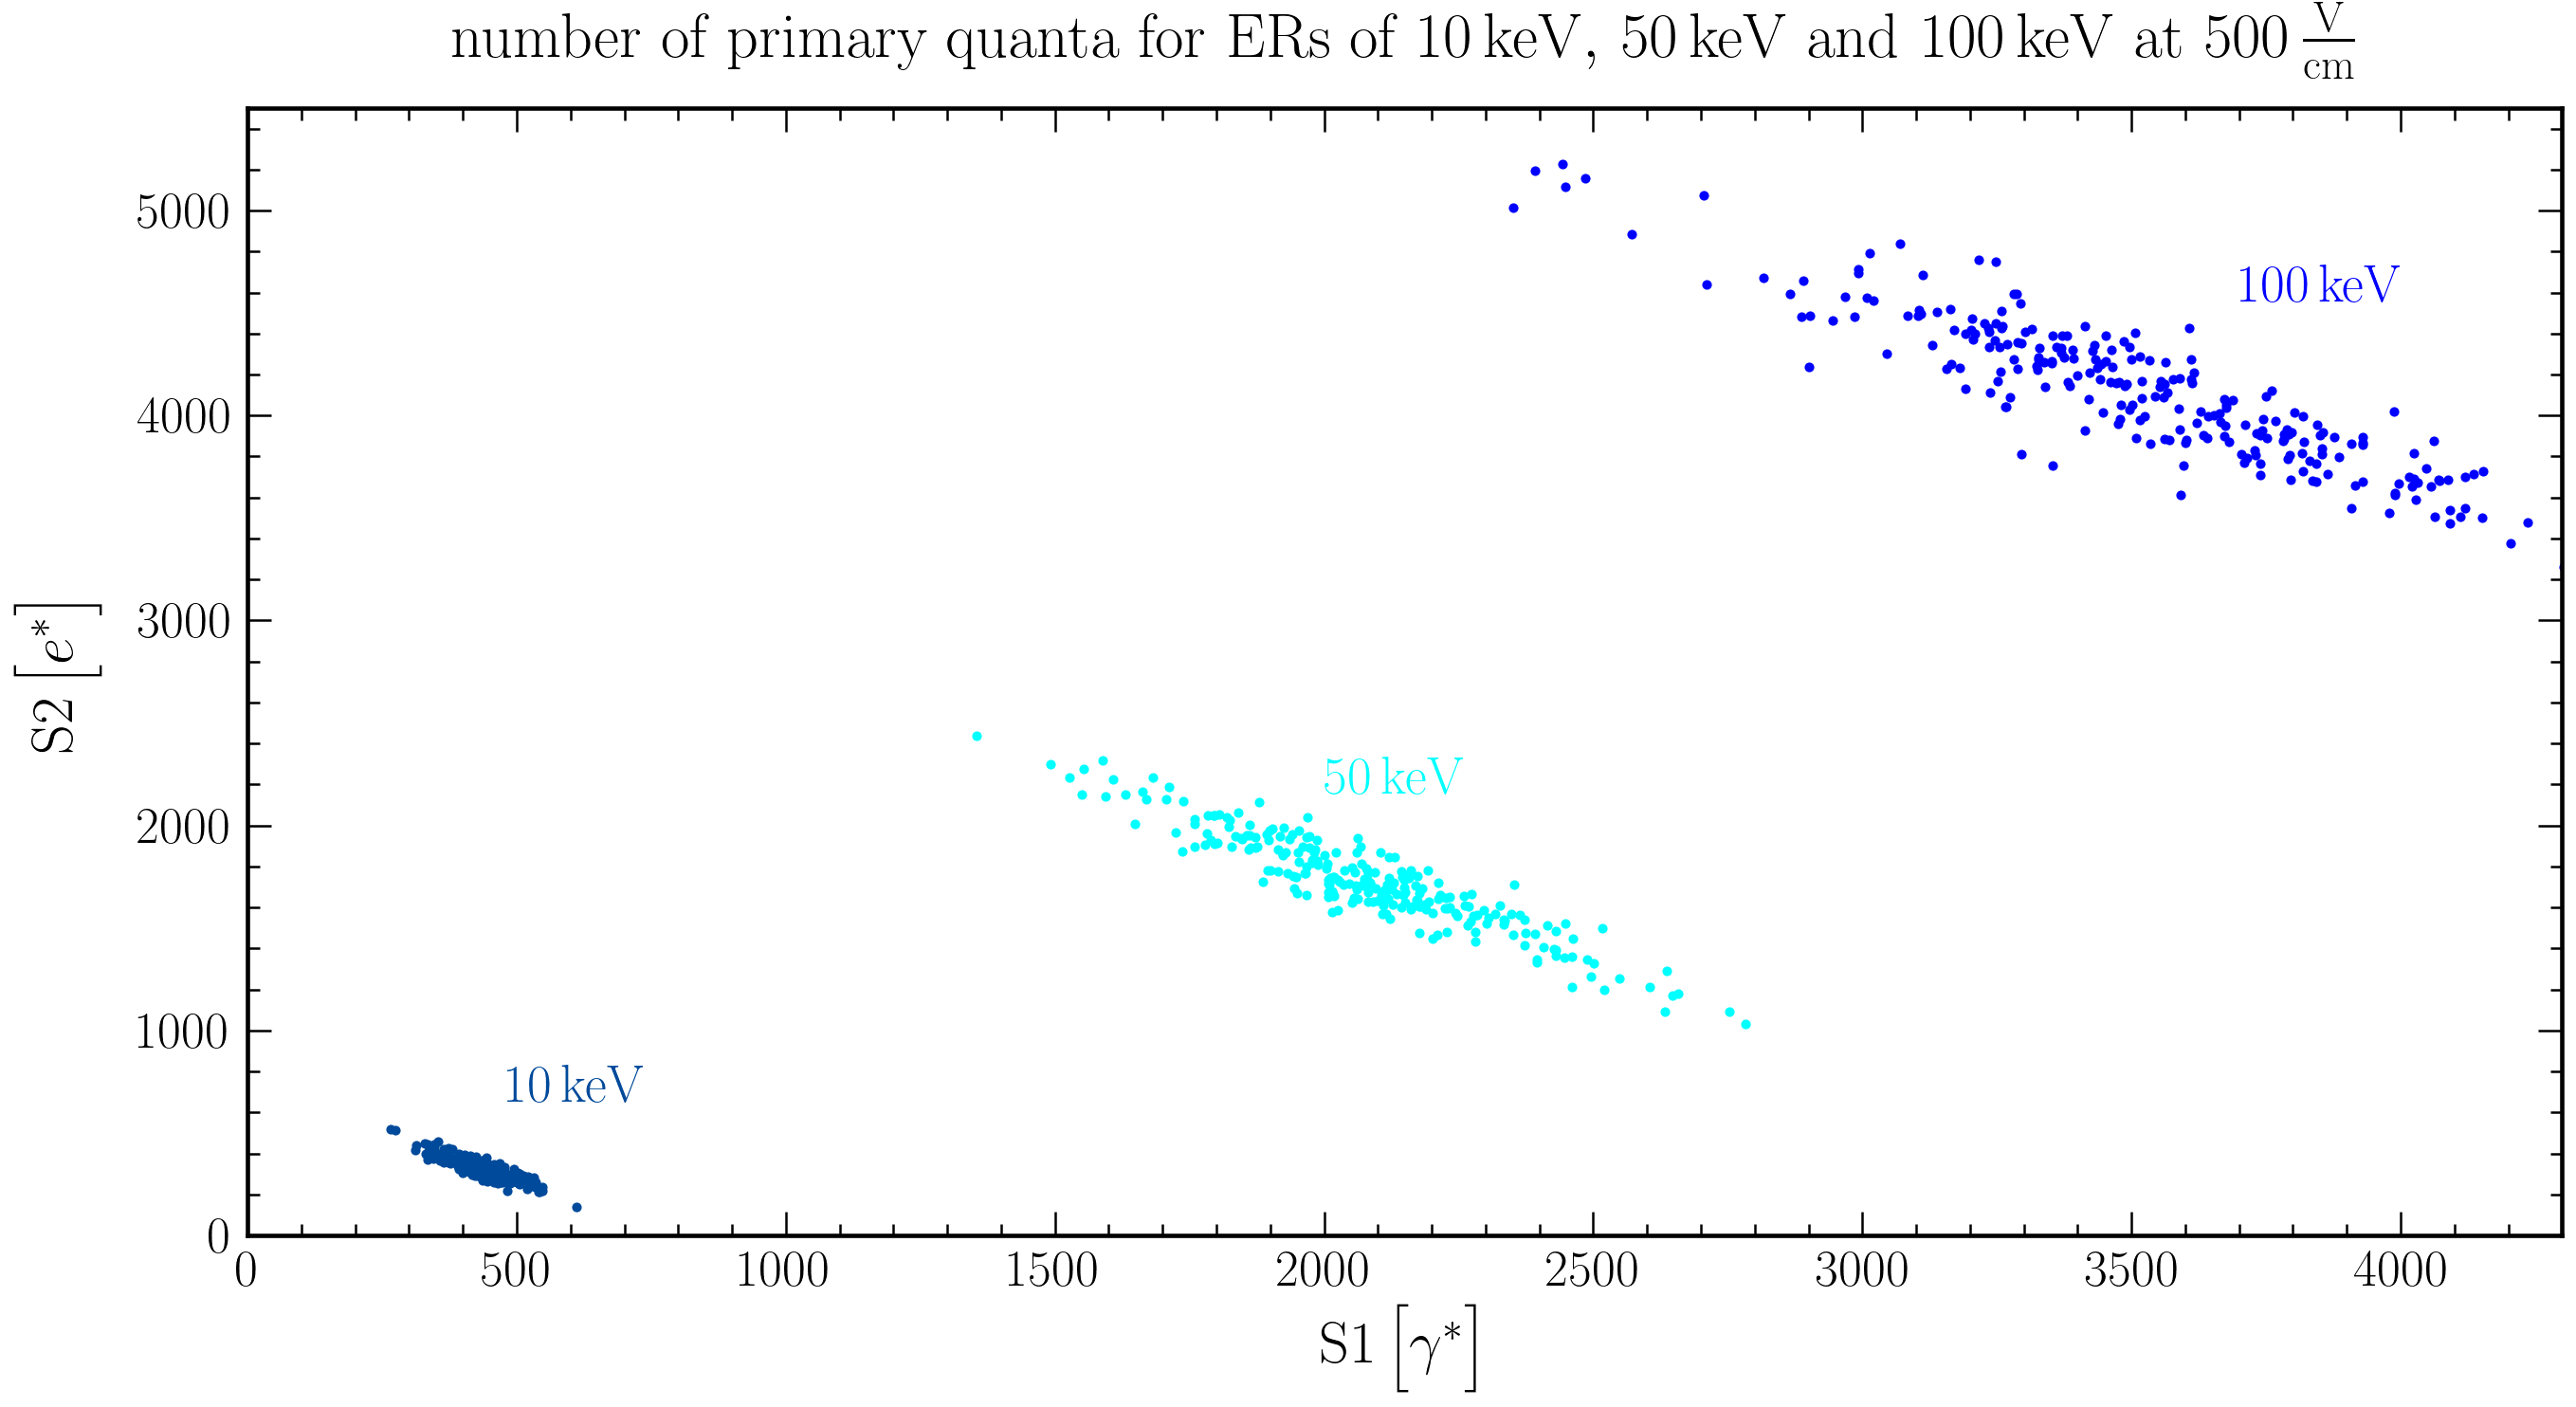

In [4]:
data = SF.load_sf_ndarray("DetectorExample_XENON10__gnampfinos_specific_energy_depositions")

### ----------------------------------------------------------------------------------------
### plotting
### ----------------------------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(21, 10.5), dpi=150)
# plotting data
plt.scatter(data["number_of_photons"][(data["energy_deposition"]==10) & (data["interaction_type"]=="ER")], data["number_of_electrons"][(data["energy_deposition"]==10) & (data["interaction_type"]=="ER")], marker="o", s=15, c=darwin_blue, alpha=1.00, linewidth=None, label="Data")
plt.scatter(data["number_of_photons"][(data["energy_deposition"]==50) & (data["interaction_type"]=="ER")], data["number_of_electrons"][(data["energy_deposition"]==50) & (data["interaction_type"]=="ER")], marker="o", s=15, c="cyan", alpha=1.00, linewidth=None, label="Data")
plt.scatter(data["number_of_photons"][(data["energy_deposition"]==100) & (data["interaction_type"]=="ER")], data["number_of_electrons"][(data["energy_deposition"]==100) & (data["interaction_type"]=="ER")], marker="o", s=15, c="blue", alpha=1.00, linewidth=None, label="Data")
# ticks
ax1.tick_params(axis='both')
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.2)
ax1.tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
ax1.tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
# tick labels
ax1.tick_params(axis="x", labelsize=26, pad=8)
ax1.tick_params(axis="y", labelsize=26, pad=8)
# axes range
ax1.set_xlim([0,4300])
ax1.set_ylim([0,5500])
# x and y label
ax1.set_xlabel("$\mathrm{S1}\,\\big[\gamma^{*}\\big]$", fontsize=30, labelpad=4)
ax1.set_ylabel("$\mathrm{S2}\,\\big[e^{*}\\big]$",fontsize=30, labelpad = 18)
# text
plt.text(x=480, y=600, s="$10\,\mathrm{keV}$", color=darwin_blue, fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
plt.text(x=2000, y=2100, s="$50\,\mathrm{keV}$", color="cyan", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
plt.text(x=3700, y=4500, s="$100\,\mathrm{keV}$", color="blue", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
# title
plt.title("number of primary quanta for ERs of $10\,\\mathrm{keV},\,50\,\\mathrm{keV}$ and $100\,\\mathrm{keV}$ at $500\,\\mathrm{\\frac{V}{cm}}$", fontsize=32, pad=15)
plt.show()
# saving
fig.savefig(path_output_psf +"number_of_primary_quanta_for_ERs_of_10_50_100_keV_at_500Vcm" +".png")
### ----------------------------------------------------------------------------------------

#### NR

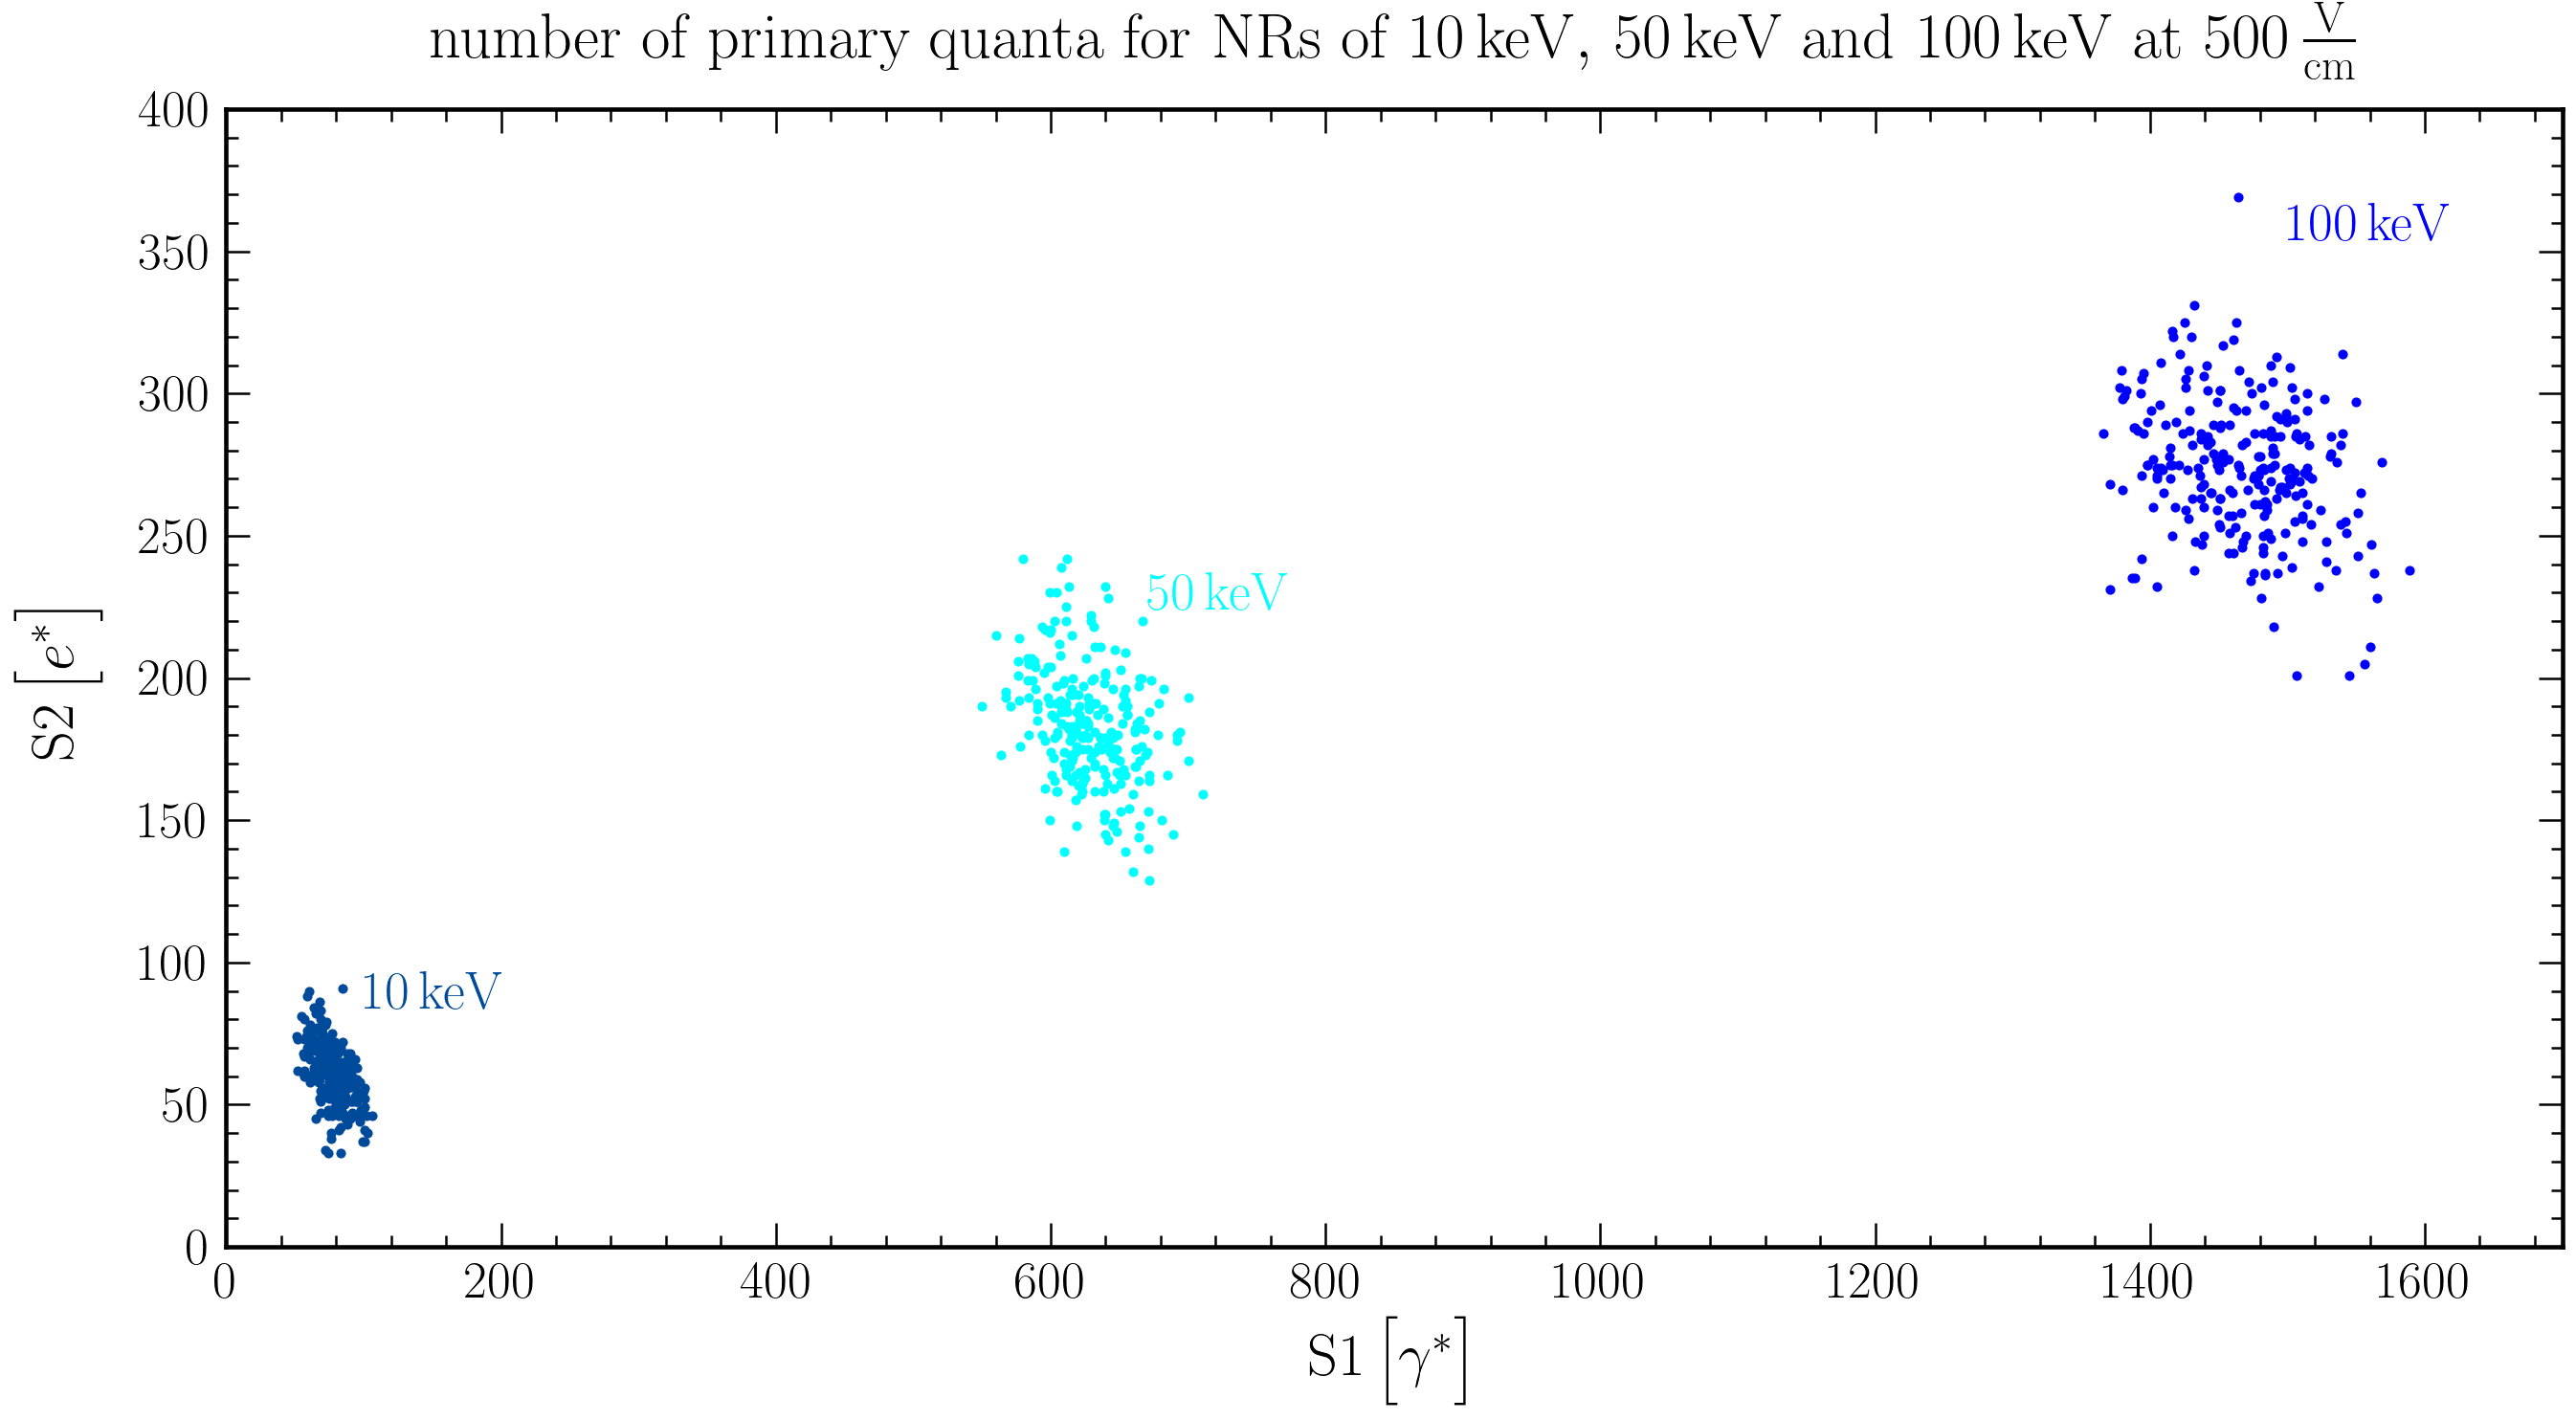

In [5]:
data = SF.load_sf_ndarray("DetectorExample_XENON10__gnampfinos_specific_energy_depositions")

### ----------------------------------------------------------------------------------------
### plotting
### ----------------------------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(21, 10.5), dpi=150)
# plotting data
plt.scatter(data["number_of_photons"][(data["energy_deposition"]==10) & (data["interaction_type"]=="NR")], data["number_of_electrons"][(data["energy_deposition"]==10) & (data["interaction_type"]=="NR")], marker="o", s=15, c=darwin_blue, alpha=1.00, linewidth=None, label="Data")
plt.scatter(data["number_of_photons"][(data["energy_deposition"]==50) & (data["interaction_type"]=="NR")], data["number_of_electrons"][(data["energy_deposition"]==50) & (data["interaction_type"]=="NR")], marker="o", s=15, c="cyan", alpha=1.00, linewidth=None, label="Data")
plt.scatter(data["number_of_photons"][(data["energy_deposition"]==100) & (data["interaction_type"]=="NR")], data["number_of_electrons"][(data["energy_deposition"]==100) & (data["interaction_type"]=="NR")], marker="o", s=15, c="blue", alpha=1.00, linewidth=None, label="Data")
# ticks
ax1.tick_params(axis='both')
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.2)
ax1.tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
ax1.tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
# tick labels
ax1.tick_params(axis="x", labelsize=26, pad=8)
ax1.tick_params(axis="y", labelsize=26, pad=8)
# axes range
ax1.set_xlim([0,1700])
ax1.set_ylim([0,400])
# x and y label
ax1.set_xlabel("$\mathrm{S1}\,\\big[\gamma^{*}\\big]$", fontsize=30, labelpad=4)
ax1.set_ylabel("$\mathrm{S2}\,\\big[e^{*}\\big]$",fontsize=30, labelpad = 18)
# text
plt.text(x=100, y=80, s="$10\,\mathrm{keV}$", color=darwin_blue, fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
plt.text(x=670, y=220, s="$50\,\mathrm{keV}$", color="cyan", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
plt.text(x=1500, y=350, s="$100\,\mathrm{keV}$", color="blue", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
# title
plt.title("number of primary quanta for NRs of $10\,\\mathrm{keV},\,50\,\\mathrm{keV}$ and $100\,\\mathrm{keV}$ at $500\,\\mathrm{\\frac{V}{cm}}$", fontsize=32, pad=15)
plt.show()
# saving
fig.savefig(path_output_psf +"number_of_primary_quanta_for_NRs_of_10_50_100_keV_at_500Vcm" +".png")
### ----------------------------------------------------------------------------------------

## 1.2 Distribution of Primary Quanta

In [13]:
flag_executethiscell = True

if flag_executethiscell == True:

    # loading the data and subdatasets and defining input parameters
    data = np.load("./output_sf/20200212__gnampfinos_nightly_test__darwin_firsttest.npy")
    mask_list, datasubsets_list = SF_process.gen_subdatasets_from_gnampfino_data(data=data)
    x_range_perc = 20
    num_of_bins = 110
    print(mask_list)

[['ER', 1.0, 50.0], ['ER', 2.0, 50.0], ['ER', 5.0, 50.0], ['ER', 10.0, 50.0], ['ER', 20.0, 50.0], ['ER', 50.0, 50.0], ['ER', 100.0, 50.0], ['ER', 200.0, 50.0], ['ER', 500.0, 50.0], ['ER', 1.0, 100.0], ['ER', 2.0, 100.0], ['ER', 5.0, 100.0], ['ER', 10.0, 100.0], ['ER', 20.0, 100.0], ['ER', 50.0, 100.0], ['ER', 100.0, 100.0], ['ER', 200.0, 100.0], ['ER', 500.0, 100.0], ['ER', 1.0, 500.0], ['ER', 2.0, 500.0], ['ER', 5.0, 500.0], ['ER', 10.0, 500.0], ['ER', 20.0, 500.0], ['ER', 50.0, 500.0], ['ER', 100.0, 500.0], ['ER', 200.0, 500.0], ['ER', 500.0, 500.0]]
[['ER', 1.0, 50.0], ['ER', 2.0, 50.0], ['ER', 5.0, 50.0], ['ER', 10.0, 50.0], ['ER', 20.0, 50.0], ['ER', 50.0, 50.0], ['ER', 100.0, 50.0], ['ER', 200.0, 50.0], ['ER', 500.0, 50.0], ['ER', 1.0, 100.0], ['ER', 2.0, 100.0], ['ER', 5.0, 100.0], ['ER', 10.0, 100.0], ['ER', 20.0, 100.0], ['ER', 50.0, 100.0], ['ER', 100.0, 100.0], ['ER', 200.0, 100.0], ['ER', 500.0, 100.0], ['ER', 1.0, 500.0], ['ER', 2.0, 500.0], ['ER', 5.0, 500.0], ['ER', 10.0

[50.0, 100.0, 500.0]
[1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]
[]
[]
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins

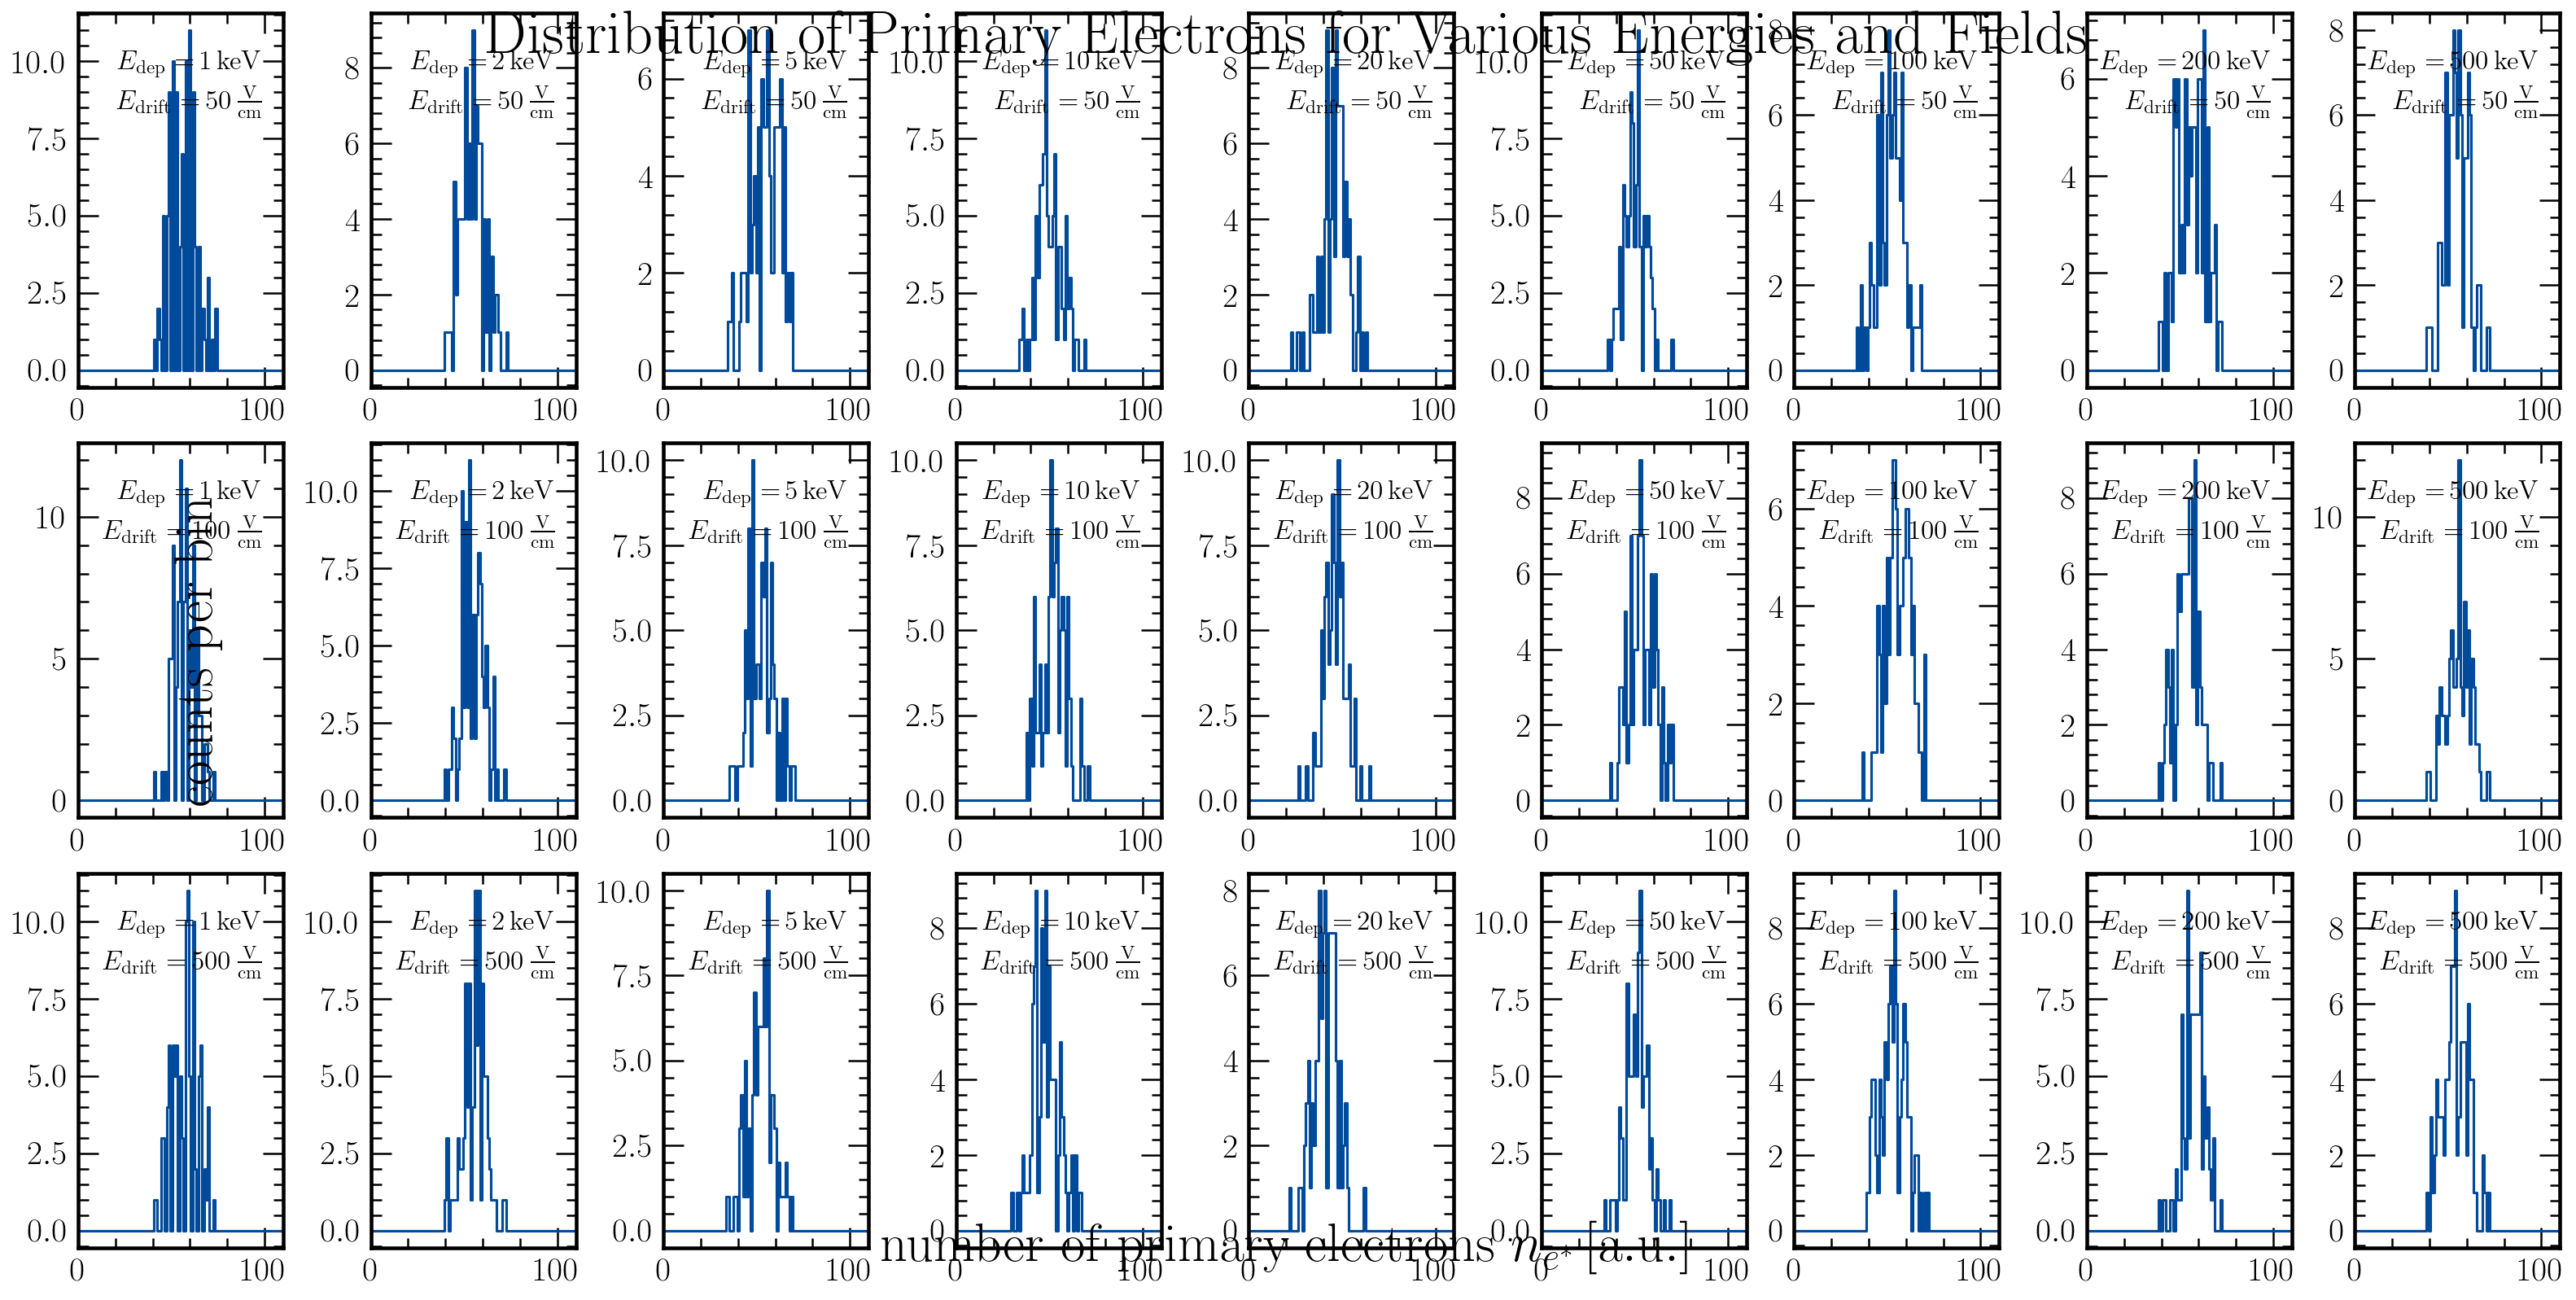

In [15]:


### plotting the various distributions of primary quanta
energy_deposition_list = []
mean_number_of_electrons_list = []
spread_in_electrons_list = []
### setting up the figure canvas
n_rows, n_cols, mask_list_dict = SF_process.calc_subplot_dimensions_for_subsets(mask_list=mask_list)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(21, 10.5), dpi=150)

for i in range(len(mask_list)):

    # reading out the sub-sample properties
    interaction = mask_list[i][0]
    energy = mask_list[i][1]
    field = mask_list[i][2]

    ### retrieving the data, fit data
    # retrieving data
    counts_electrons_i, number_of_quanta_e_i = SF_process.get_histogram_data_from_primary_quanta_data(quanta_data=datasubsets_list[i]["number_of_electrons"])
    counts_photons_i, number_of_quanta_p_i = SF_process.get_histogram_data_from_primary_quanta_data(quanta_data=datasubsets_list[i]["number_of_photons"])
    # rebinning
    counts_electrons, number_of_quanta_e = SF_process.rebin_histogram_data(x_data=number_of_quanta_e_i, counts_data=counts_electrons_i, rebin_by_number=False, set_number_of_bins=num_of_bins, ret_bin_numbers_as_bin_centers=True)
    counts_photons, number_of_quanta_p = SF_process.rebin_histogram_data(x_data=number_of_quanta_p_i, counts_data=counts_photons_i, rebin_by_number=False, set_number_of_bins=num_of_bins, ret_bin_numbers_as_bin_centers=True)
    # stepizing
    counts_electrons_stepized, number_of_quanta_e_stepized = SF_process.stepize_primary_quanta_histogram_data(counts=counts_electrons, number_of_quanta=number_of_quanta_e)
    counts_photons_stepized, number_of_quanta_p_stepized = SF_process.stepize_primary_quanta_histogram_data(counts=counts_photons, number_of_quanta=number_of_quanta_p)
    # fitting
    #A_e, mu_e, sigma_e, sA_e, smu_e, ssigma_e = SF.fit_gaussian_to_histogram_data(counts=counts_electrons, number_of_quanta=number_of_quanta_e)
    #A_p, mu_p, sigma_p, sA_p, smu_p, ssigma_p = SF.fit_gaussian_to_histogram_data(counts=counts_photons, number_of_quanta=number_of_quanta_p)

    ### plotting
    # plotting data
    coord_col, coord_row = SF_process.determine_subplot_coordinates_for_mask_list_entry_from_mask_list_dict(mask_list_dict=mask_list_dict, mask_list_entry=mask_list[i])
    axs[coord_row, coord_col].plot(number_of_quanta_e_stepized, counts_electrons_stepized, color=darwin_blue, linewidth=1.5, linestyle="-", label="Data")
    # ticks
    axs[coord_row, coord_col].tick_params(axis='both')
    for axis in ['top','bottom','left','right']:
        axs[coord_row, coord_col].spines[axis].set_linewidth(2.2)
    axs[coord_row, coord_col].tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
    axs[coord_row, coord_col].tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
    axs[coord_row, coord_col].xaxis.set_minor_locator(AutoMinorLocator(5))
    axs[coord_row, coord_col].yaxis.set_minor_locator(AutoMinorLocator(5))
    # tick labels
    axs[coord_row, coord_col].tick_params(axis="x", labelsize=20, pad=6)
    axs[coord_row, coord_col].tick_params(axis="y", labelsize=20, pad=6)
    # axes range
    axs[coord_row, coord_col].set_xlim(0,num_of_bins)
    #axs[coord_row, coord_col].set_xlim([min(number_of_quanta_e_stepized),max(number_of_quanta_e_stepized)])
    #axs[coord_row, coord_col].set_ylim([0,max(counts_electrons_stepized)*1.15])
    #ax1.hlines(y=10, xmin=np.min(energy_deposition_list)-100, xmax=np.max(energy_deposition_list)+100, colors='black', linestyles='-', label='')
    # text
    energystring = "$E_{\mathrm{dep}}=\,$" +"{:.0f}".format(energy) +"$\,\mathrm{keV}$"
    fieldstring = "$E_{\mathrm{drift}}=\,$" +"{:.0f}".format(field) +"$\,\\mathrm{\\frac{V}{cm}}$"
    axs[coord_row, coord_col].text(x=0.90, y=0.86, s=energystring, color="black", fontsize=16, verticalalignment='center', horizontalalignment='right', zorder=2, transform=axs[coord_row, coord_col].transAxes)
    axs[coord_row, coord_col].text(x=0.90, y=0.75, s=fieldstring, color="black", fontsize=16, verticalalignment='center', horizontalalignment='right', zorder=2, transform=axs[coord_row, coord_col].transAxes)
    # legend
    #ps = p1 +p2
    #lbls = [l.get_label() for l in ps]
    #ax1.legend(ps, lbls, loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    #ax1.legend(loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)

# saving
fig.text(0.5, 0.965, 'Distribution of Primary Electrons for Various Energies and Fields', ha='center', fontsize=36)
if mask_list_dict["ER_field_list"]!=[] and mask_list_dict["NR_field_list"]!=[]:
    fig.text(0.319, 0.90, 'ER', ha='center', fontsize=32)
    fig.text(0.711, 0.90, 'NR', ha='center', fontsize=32)
fig.text(0.5, 0.03, 'number of primary electrons $n_{e^{*}}\,\\big[\mathrm{a.u.}\\big]$', ha='center', va='center', fontsize=32)
fig.text(0.075, 0.5, 'counts per bin', ha='center', va='center', rotation='vertical', fontsize=32)
plt.show()
fig.savefig(path_output_psf +"distribution_of_primary_electrons_for_various_energies_and_fields" +".png", transparent=False)


[50.0, 100.0, 500.0]
[1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]
[]
[]
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins.
Rebinning to 110 bins

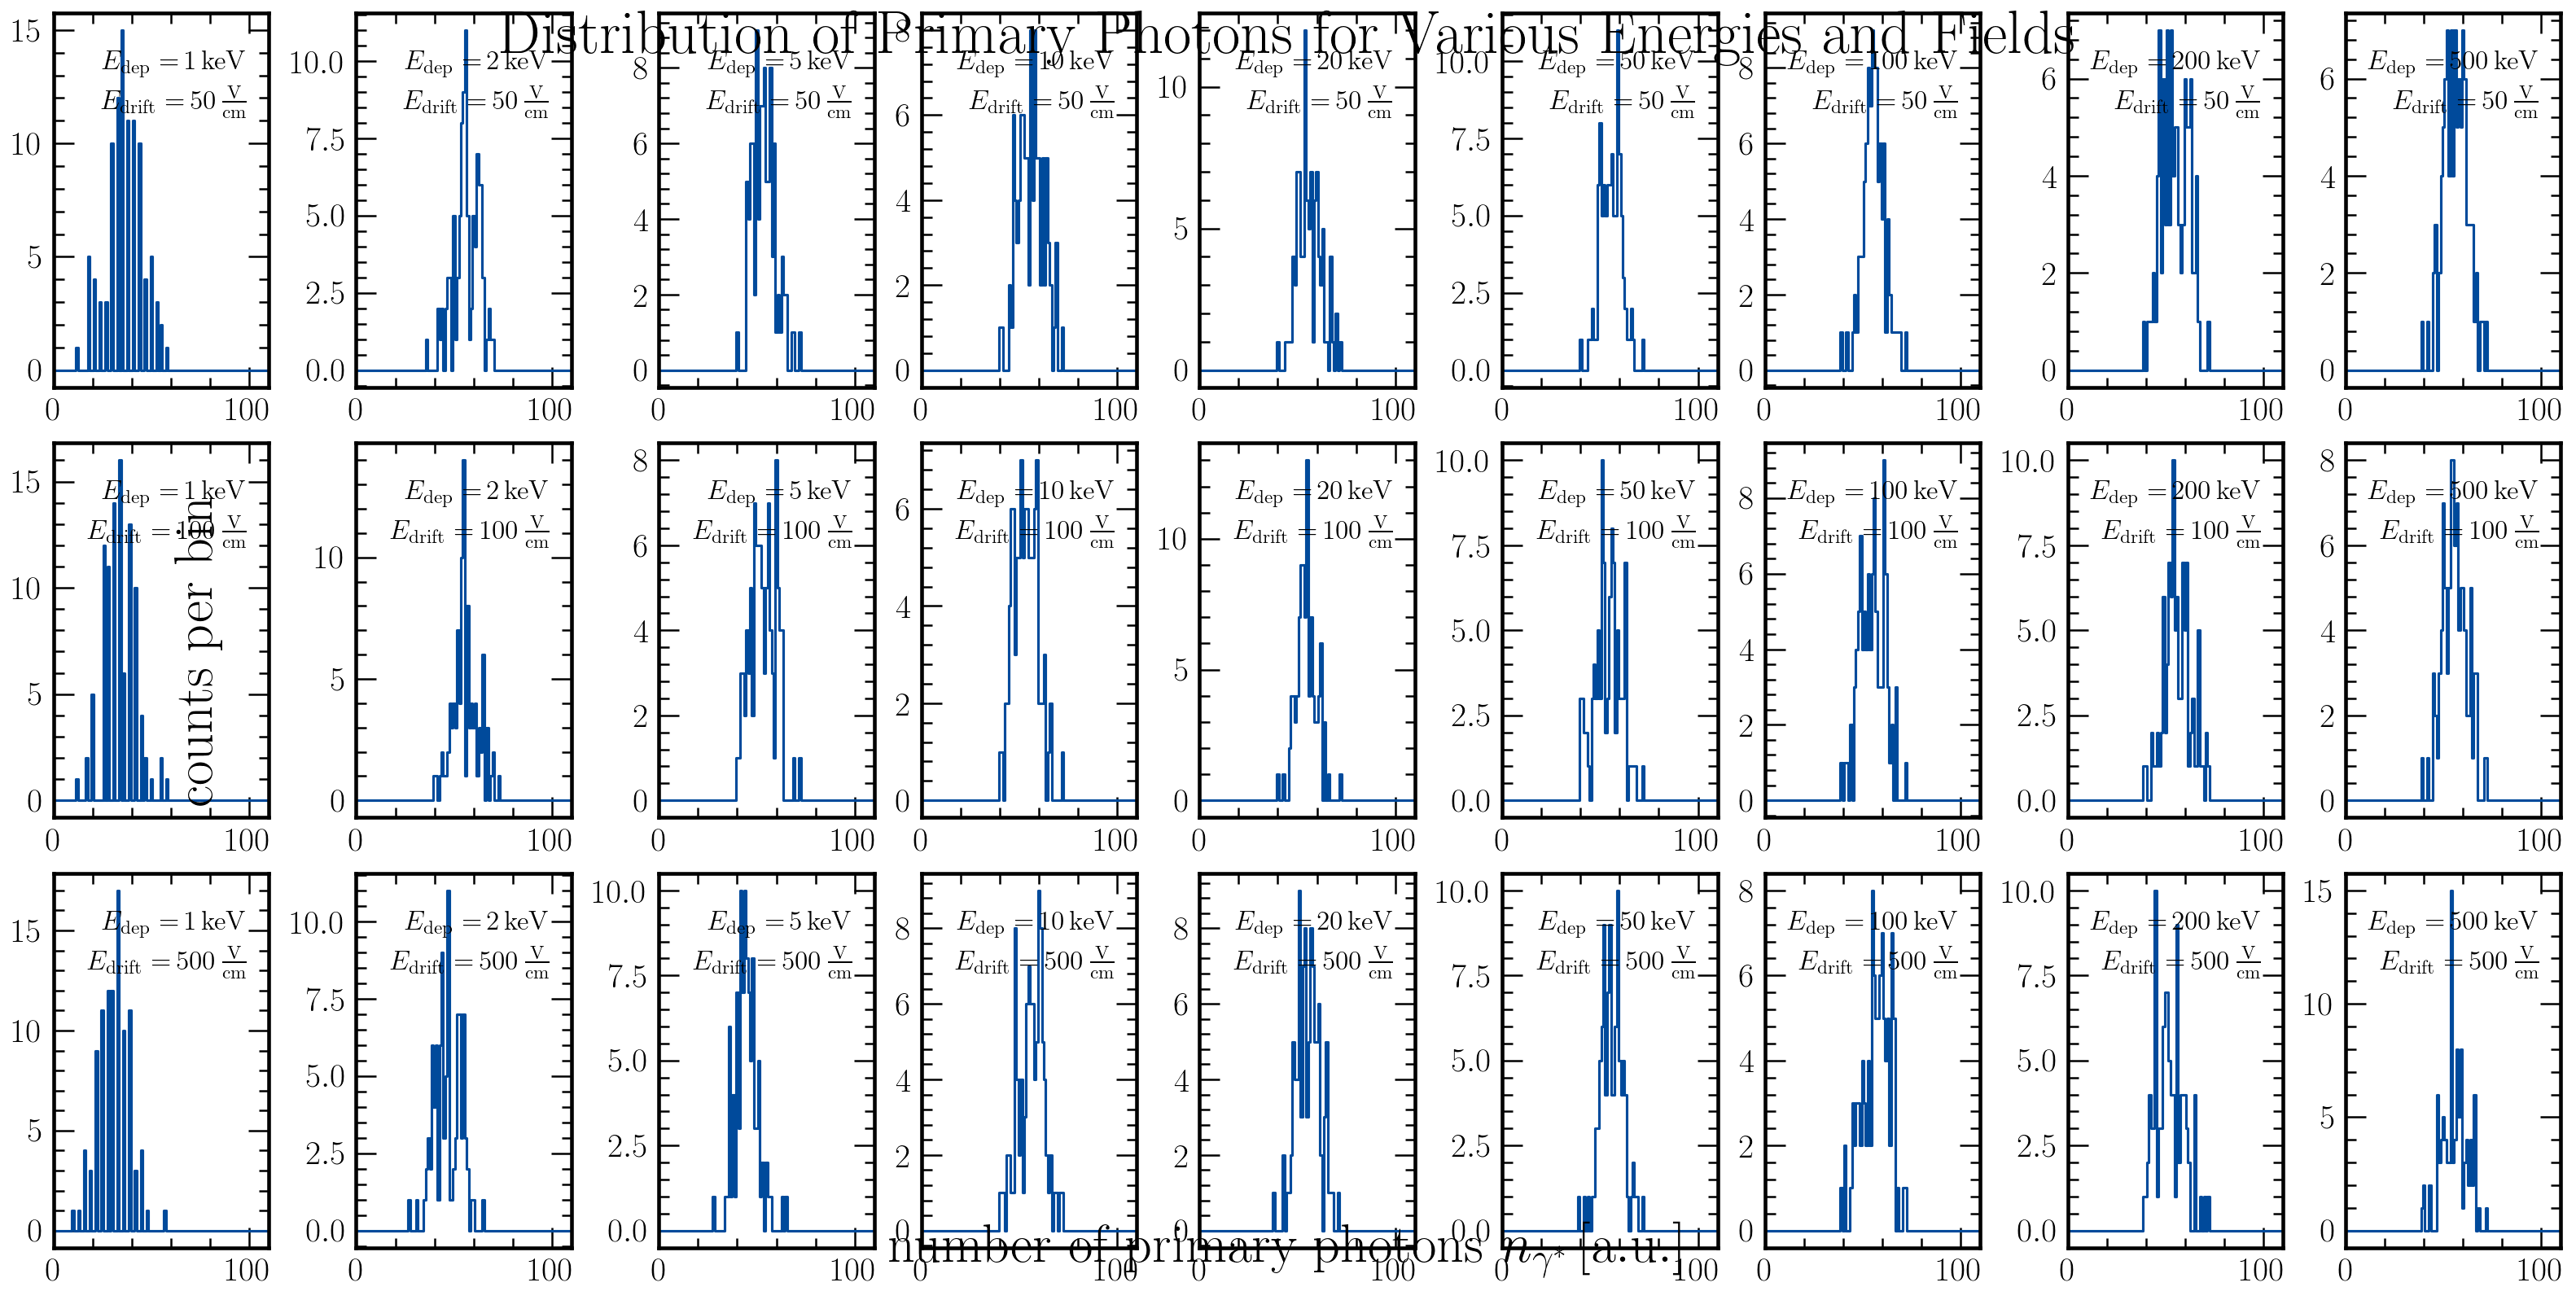

In [16]:


### plotting the various distributions of primary quanta
energy_deposition_list = []
mean_number_of_electrons_list = []
spread_in_electrons_list = []
### setting up the figure canvas
n_rows, n_cols, mask_list_dict = SF_process.calc_subplot_dimensions_for_subsets(mask_list=mask_list)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(21, 10.5), dpi=150)

for i in range(len(mask_list)):

    # reading out the sub-sample properties
    interaction = mask_list[i][0]
    energy = mask_list[i][1]
    field = mask_list[i][2]

    ### retrieving the data, fit data
    # retrieving the data
    counts_electrons_i, number_of_quanta_e_i = SF_process.get_histogram_data_from_primary_quanta_data(quanta_data=datasubsets_list[i]["number_of_electrons"])
    counts_photons_i, number_of_quanta_p_i = SF_process.get_histogram_data_from_primary_quanta_data(quanta_data=datasubsets_list[i]["number_of_photons"])
    # rebinning
    counts_electrons, number_of_quanta_e = SF_process.rebin_histogram_data(x_data=number_of_quanta_e_i, counts_data=counts_electrons_i, rebin_by_number=False, set_number_of_bins=num_of_bins, ret_bin_numbers_as_bin_centers=True)
    counts_photons, number_of_quanta_p = SF_process.rebin_histogram_data(x_data=number_of_quanta_p_i, counts_data=counts_photons_i, rebin_by_number=False, set_number_of_bins=num_of_bins, ret_bin_numbers_as_bin_centers=True)
    # stepizing
    counts_electrons_stepized, number_of_quanta_e_stepized = SF_process.stepize_primary_quanta_histogram_data(counts=counts_electrons, number_of_quanta=number_of_quanta_e)
    counts_photons_stepized, number_of_quanta_p_stepized = SF_process.stepize_primary_quanta_histogram_data(counts=counts_photons, number_of_quanta=number_of_quanta_p)
    # fitting
    A_e, mu_e, sigma_e, sA_e, smu_e, ssigma_e = SF_process.fit_gaussian_to_histogram_data(counts=counts_electrons, number_of_quanta=number_of_quanta_e)
    A_p, mu_p, sigma_p, sA_p, smu_p, ssigma_p = SF_process.fit_gaussian_to_histogram_data(counts=counts_photons, number_of_quanta=number_of_quanta_p)

    ### plotting
    # plotting data
    coord_col, coord_row = SF_process.determine_subplot_coordinates_for_mask_list_entry_from_mask_list_dict(mask_list_dict=mask_list_dict, mask_list_entry=mask_list[i])
    axs[coord_row, coord_col].plot(number_of_quanta_p_stepized, counts_photons_stepized, color=darwin_blue, linewidth=1.5, linestyle="-", label="Data")
    # ticks
    axs[coord_row, coord_col].tick_params(axis='both')
    for axis in ['top','bottom','left','right']:
        axs[coord_row, coord_col].spines[axis].set_linewidth(2.2)
    axs[coord_row, coord_col].tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
    axs[coord_row, coord_col].tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
    axs[coord_row, coord_col].xaxis.set_minor_locator(AutoMinorLocator(5))
    axs[coord_row, coord_col].yaxis.set_minor_locator(AutoMinorLocator(5))
    # tick labels
    axs[coord_row, coord_col].tick_params(axis="x", labelsize=20, pad=6)
    axs[coord_row, coord_col].tick_params(axis="y", labelsize=20, pad=6)
    # axes range
    axs[coord_row, coord_col].set_xlim(0,num_of_bins)
    #axs[coord_row, coord_col].set_xlim([min(number_of_quanta_p_stepized),max(number_of_quanta_p_stepized)])
    #axs[coord_row, coord_col].set_ylim([0,max(counts_photons_stepized)*1.15])
    #ax1.hlines(y=10, xmin=np.min(energy_deposition_list)-100, xmax=np.max(energy_deposition_list)+100, colors='black', linestyles='-', label='')
    # text
    energystring = "$E_{\mathrm{dep}}=\,$" +"{:.0f}".format(energy) +"$\,\mathrm{keV}$"
    fieldstring = "$E_{\mathrm{drift}}=\,$" +"{:.0f}".format(field) +"$\,\\mathrm{\\frac{V}{cm}}$"
    axs[coord_row, coord_col].text(x=0.90, y=0.86, s=energystring, color="black", fontsize=16, verticalalignment='center', horizontalalignment='right', zorder=2, transform=axs[coord_row, coord_col].transAxes)
    axs[coord_row, coord_col].text(x=0.90, y=0.75, s=fieldstring, color="black", fontsize=16, verticalalignment='center', horizontalalignment='right', zorder=2, transform=axs[coord_row, coord_col].transAxes)
    # legend
    #ps = p1 +p2
    #lbls = [l.get_label() for l in ps]
    #ax1.legend(ps, lbls, loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    #ax1.legend(loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)

# saving
fig.text(0.5, 0.965, 'Distribution of Primary Photons for Various Energies and Fields', ha='center', fontsize=36)
if mask_list_dict["ER_field_list"]!=[] and mask_list_dict["NR_field_list"]!=[]:
    fig.text(0.319, 0.90, 'ER', ha='center', fontsize=32)
    fig.text(0.711, 0.90, 'NR', ha='center', fontsize=32)
fig.text(0.5, 0.03, 'number of primary photons $n_{\gamma^{*}}\,\\big[\mathrm{a.u.}\\big]$', ha='center', va='center', fontsize=32)
fig.text(0.075, 0.5, 'counts per bin', ha='center', va='center', rotation='vertical', fontsize=32)
plt.show()
fig.savefig(path_output_psf +"distribution_of_primary_photons_for_various_energies_and_fields" +".png", transparent=False)

## 1.3 When Does the Number of Primary Quanta Exceed a Certain Threshold (for Julia)?

[['ER', 0.1, 200.0], ['ER', 0.102, 200.0], ['ER', 0.104, 200.0], ['ER', 0.106, 200.0], ['ER', 0.108, 200.0], ['ER', 0.11, 200.0], ['ER', 0.112, 200.0], ['ER', 0.114, 200.0], ['ER', 0.116, 200.0], ['ER', 0.118, 200.0], ['ER', 0.12, 200.0], ['ER', 0.122, 200.0], ['ER', 0.124, 200.0], ['ER', 0.126, 200.0], ['ER', 0.128, 200.0], ['ER', 0.13, 200.0], ['ER', 0.132, 200.0], ['ER', 0.134, 200.0], ['ER', 0.136, 200.0], ['ER', 0.138, 200.0], ['ER', 0.14, 200.0], ['ER', 0.142, 200.0], ['ER', 0.144, 200.0], ['ER', 0.146, 200.0], ['ER', 0.148, 200.0], ['ER', 0.15, 200.0]]
################################################
data from subset: ER, 0.1, 200.0
mean number of primary electrons: 7.598431104202399
spread in primary electrons: 0.918596328721258
################################################
data from subset: ER, 0.102, 200.0
mean number of primary electrons: 7.795800331077379
spread in primary electrons: 0.8888051535071064
################################################
data from subset: ER

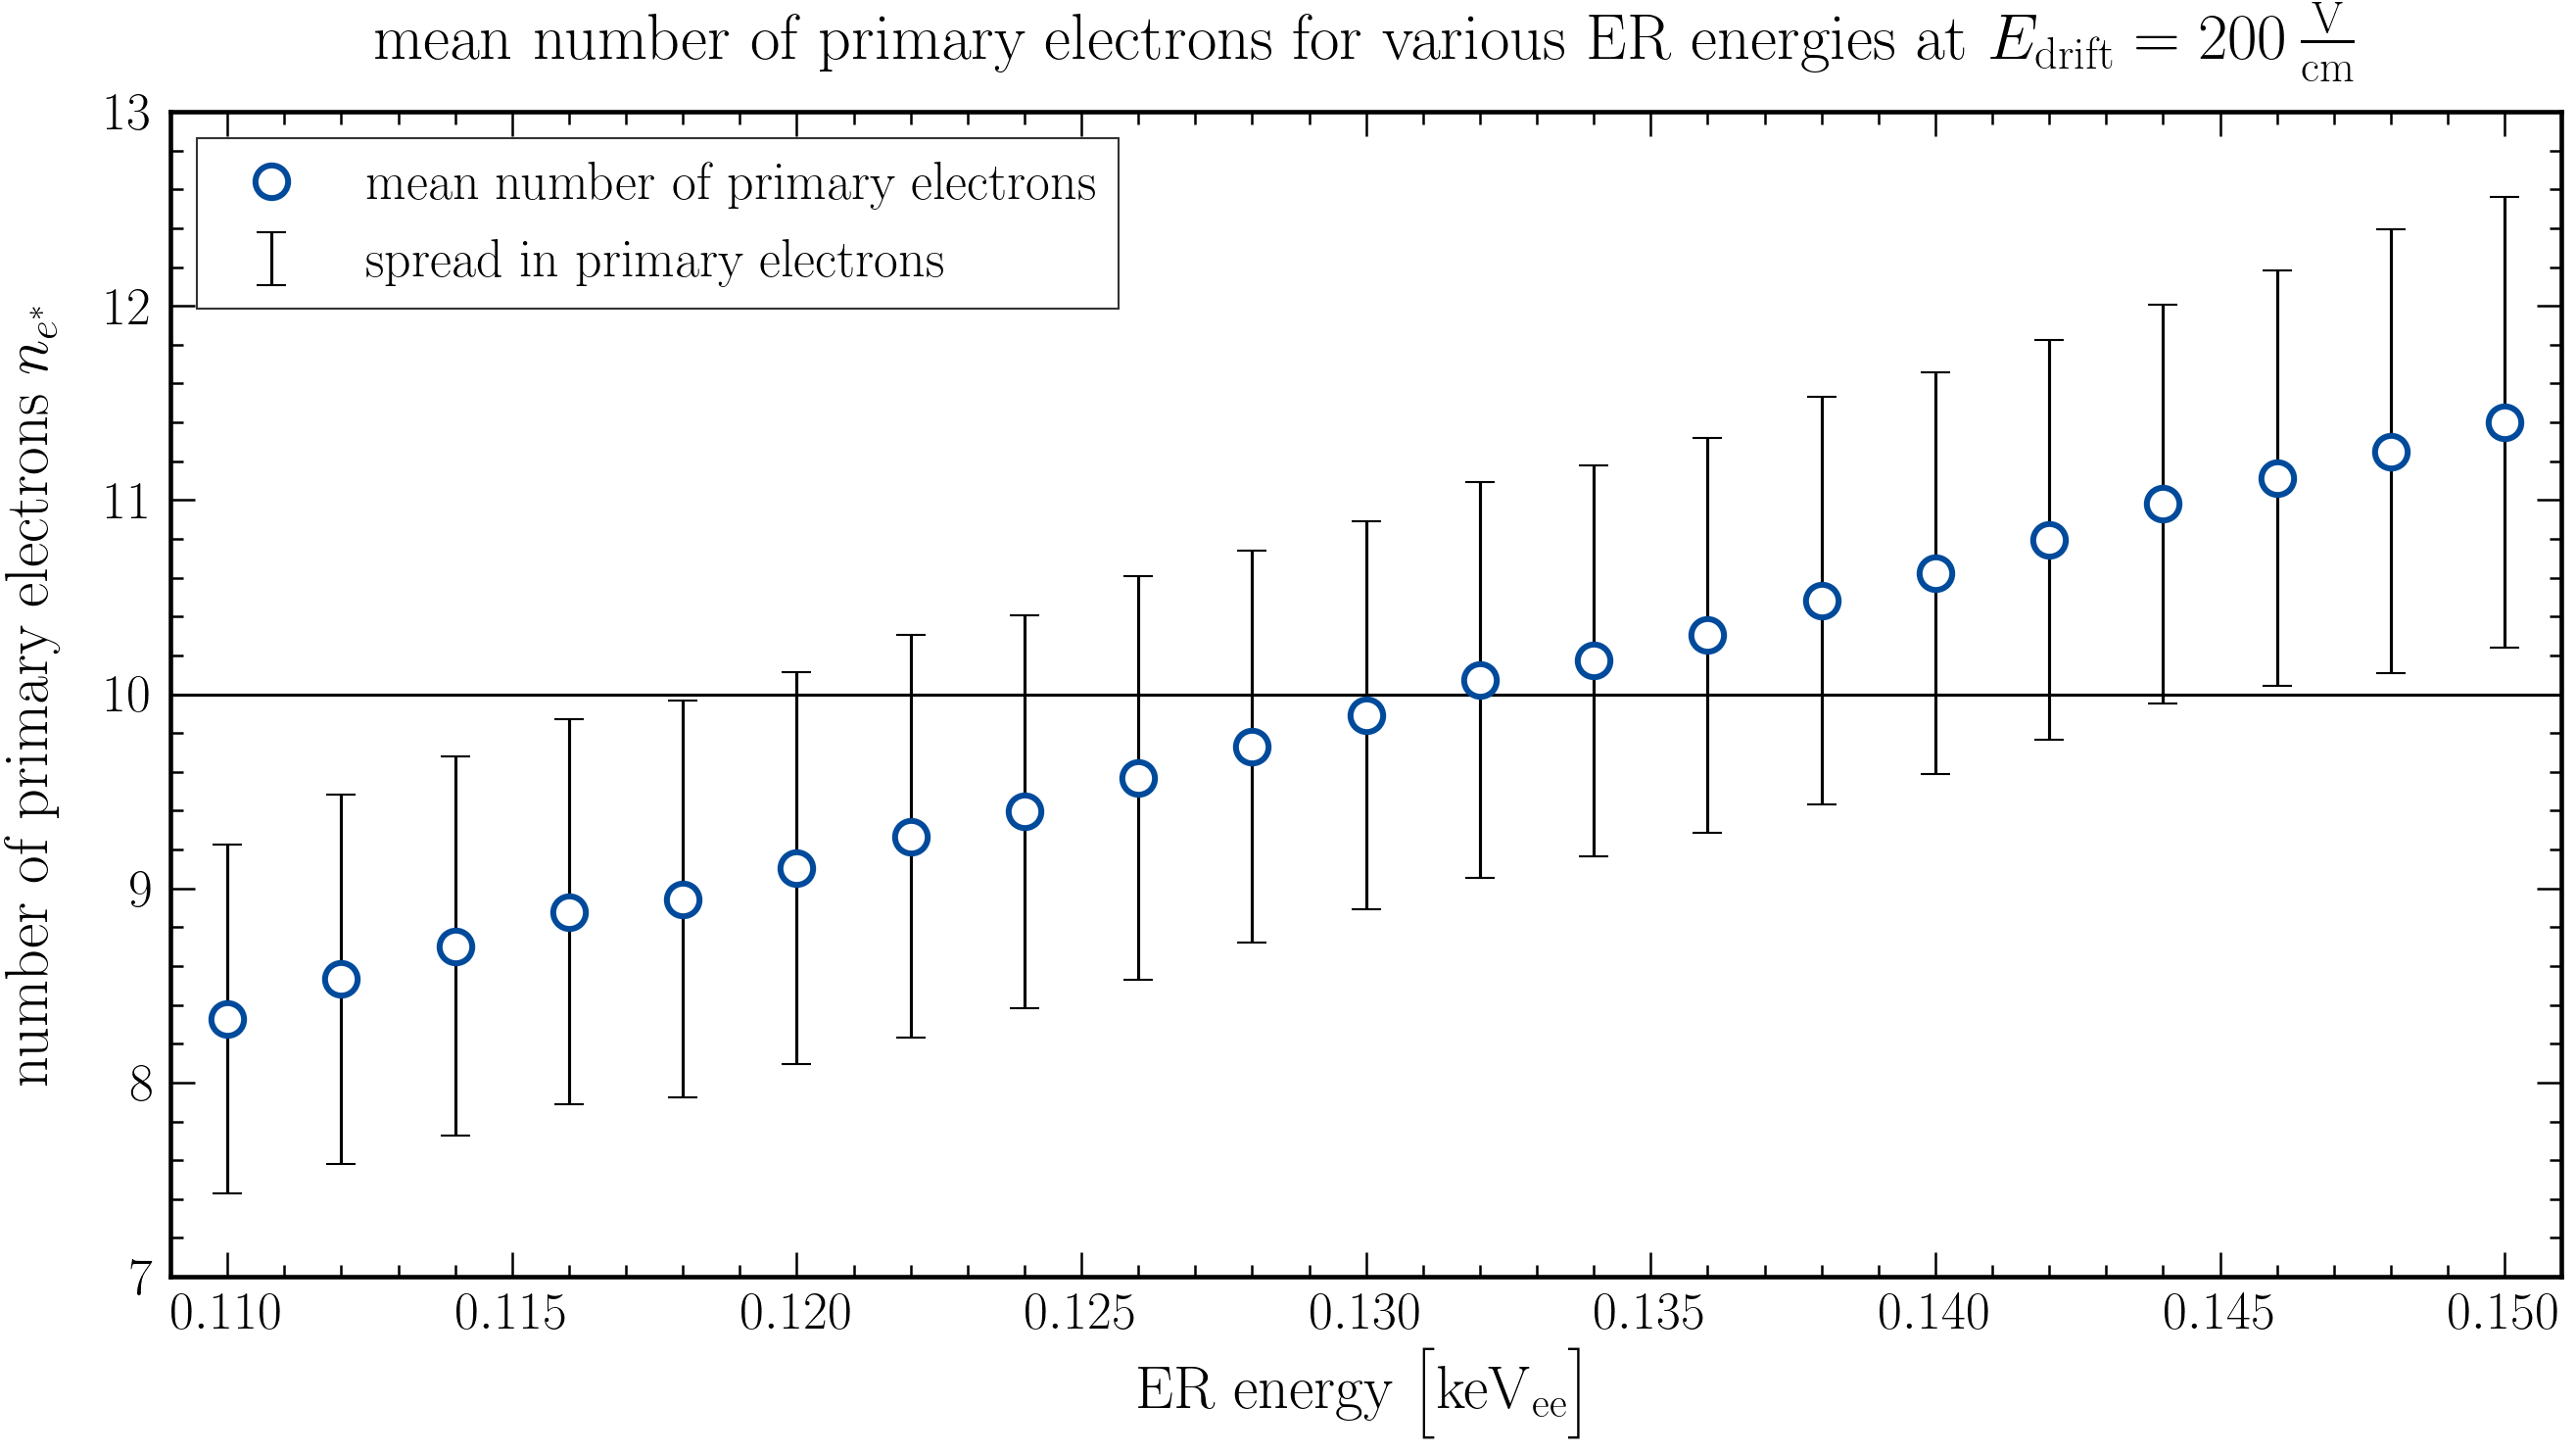

In [15]:

# loading the data and subdatasets and defining input parameters
data = SF.load_sf_ndarray("DetectorExample_XENON10__gnampfinos_julia_threshold_er_between_0_110_and_0_150_keVee.npy")
mask_list, datasubsets_list = SF.gen_subdatasets_from_gnampfino_data(data=data)
n_e_threshold = 10
e_field = 200
interaction_type = "ER"


# calculating stuff
energy_deposition_list = []
mean_number_of_electrons_list = []
spread_in_electrons_list = []
for i in range(len(mask_list)):
    counts, number_of_quanta = SF.get_histogram_data_from_primary_quanta_data(quanta_data=datasubsets_list[i]["number_of_electrons"])
    A, mu, sigma, sA, smu, ssigma = SF.fit_gaussian_to_histogram_data(counts=counts, number_of_quanta=number_of_quanta)
    energy_deposition_list.append(mask_list[i][1])
    mean_number_of_electrons_list.append(mu)
    spread_in_electrons_list.append(sigma)
    print("################################################")
    print(f"data from subset: {mask_list[i][0]}, {mask_list[i][1]}, {mask_list[i][2]}")
    print(f"mean number of primary electrons: {mu}")
    print(f"spread in primary electrons: {np.sqrt(sigma**2)}")
    #print(f"primary photons: {n_p}")


# plotting
fig, ax1 = plt.subplots(figsize=(21, 10.5), dpi=150)
# plotting data
p1 = ax1.plot(energy_deposition_list, mean_number_of_electrons_list, color=darwin_blue, linewidth=5, linestyle='', label='mean number of primary electrons', markersize=16, marker='o', markerfacecolor='w', markeredgewidth=2.9, markeredgecolor=darwin_blue)
p2 = ax1.errorbar(x=energy_deposition_list, y=mean_number_of_electrons_list, yerr=spread_in_electrons_list, xerr=None, fmt='', ecolor="black", elinewidth=None, capsize=7, linestyle='', label='spread in primary electrons')
# ticks
ax1.tick_params(axis='both')
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.2)
ax1.tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
ax1.tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
# tick labels
ax1.tick_params(axis="x", labelsize=26, pad=8)
ax1.tick_params(axis="y", labelsize=26, pad=8)
# axes range
ax1.set_xlim([0.109,0.151])
ax1.set_ylim([7,13])
# x and y label
#ax1.set_xlabel("ER energy", fontsize=30, labelpad=4)
ax1.set_xlabel("ER energy $\\big[ \\mathrm{keV}_{\\mathrm{ee}} \\big]$", fontsize=30, labelpad=4)
ax1.set_ylabel("number of primary electrons $n_{e^{*}}$",fontsize=30, labelpad = 18)
# lines
ax1.hlines(y=10, xmin=np.min(energy_deposition_list)-100, xmax=np.max(energy_deposition_list)+100, colors='black', linestyles='-', label='')
# text
#plt.text(x=3700, y=4500, s="$100\,\mathrm{keV}$", color="blue", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
# title
plt.title("mean number of primary electrons for various ER energies at $E_{\\mathrm{drift}}=200\,\\mathrm{\\frac{V}{cm}}$", fontsize=32, pad=15)
# legend
#ps = p1 +p2
#lbls = [l.get_label() for l in ps]
#ax1.legend(ps, lbls, loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)
ax1.legend(loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)
# saving
plt.show()
fig.savefig(path_output_psf +"primary_electrons_threshold_" +f"{interaction_type}" +"_at_" +f"{e_field}" +"Vcm"  +".png")


[['NR', 1.05, 200.0], ['NR', 1.1, 200.0], ['NR', 1.15, 200.0], ['NR', 1.2, 200.0], ['NR', 1.25, 200.0], ['NR', 1.3, 200.0], ['NR', 1.35, 200.0], ['NR', 1.4, 200.0], ['NR', 1.45, 200.0], ['NR', 1.5, 200.0], ['NR', 1.55, 200.0], ['NR', 1.6, 200.0], ['NR', 1.65, 200.0], ['NR', 1.7, 200.0], ['NR', 1.75, 200.0], ['NR', 1.8, 200.0], ['NR', 1.85, 200.0], ['NR', 1.9, 200.0], ['NR', 1.95, 200.0], ['NR', 2.0, 200.0]]
################################################
data from subset: NR, 1.05, 200.0
mean number of primary electrons: 7.209291062750408
spread in primary electrons: 2.681145911155254
################################################
data from subset: NR, 1.1, 200.0
mean number of primary electrons: 7.4638136633978185
spread in primary electrons: 2.7011885880136566
################################################
data from subset: NR, 1.15, 200.0
mean number of primary electrons: 7.9271560918685955
spread in primary electrons: 3.047313822170051
#########################################

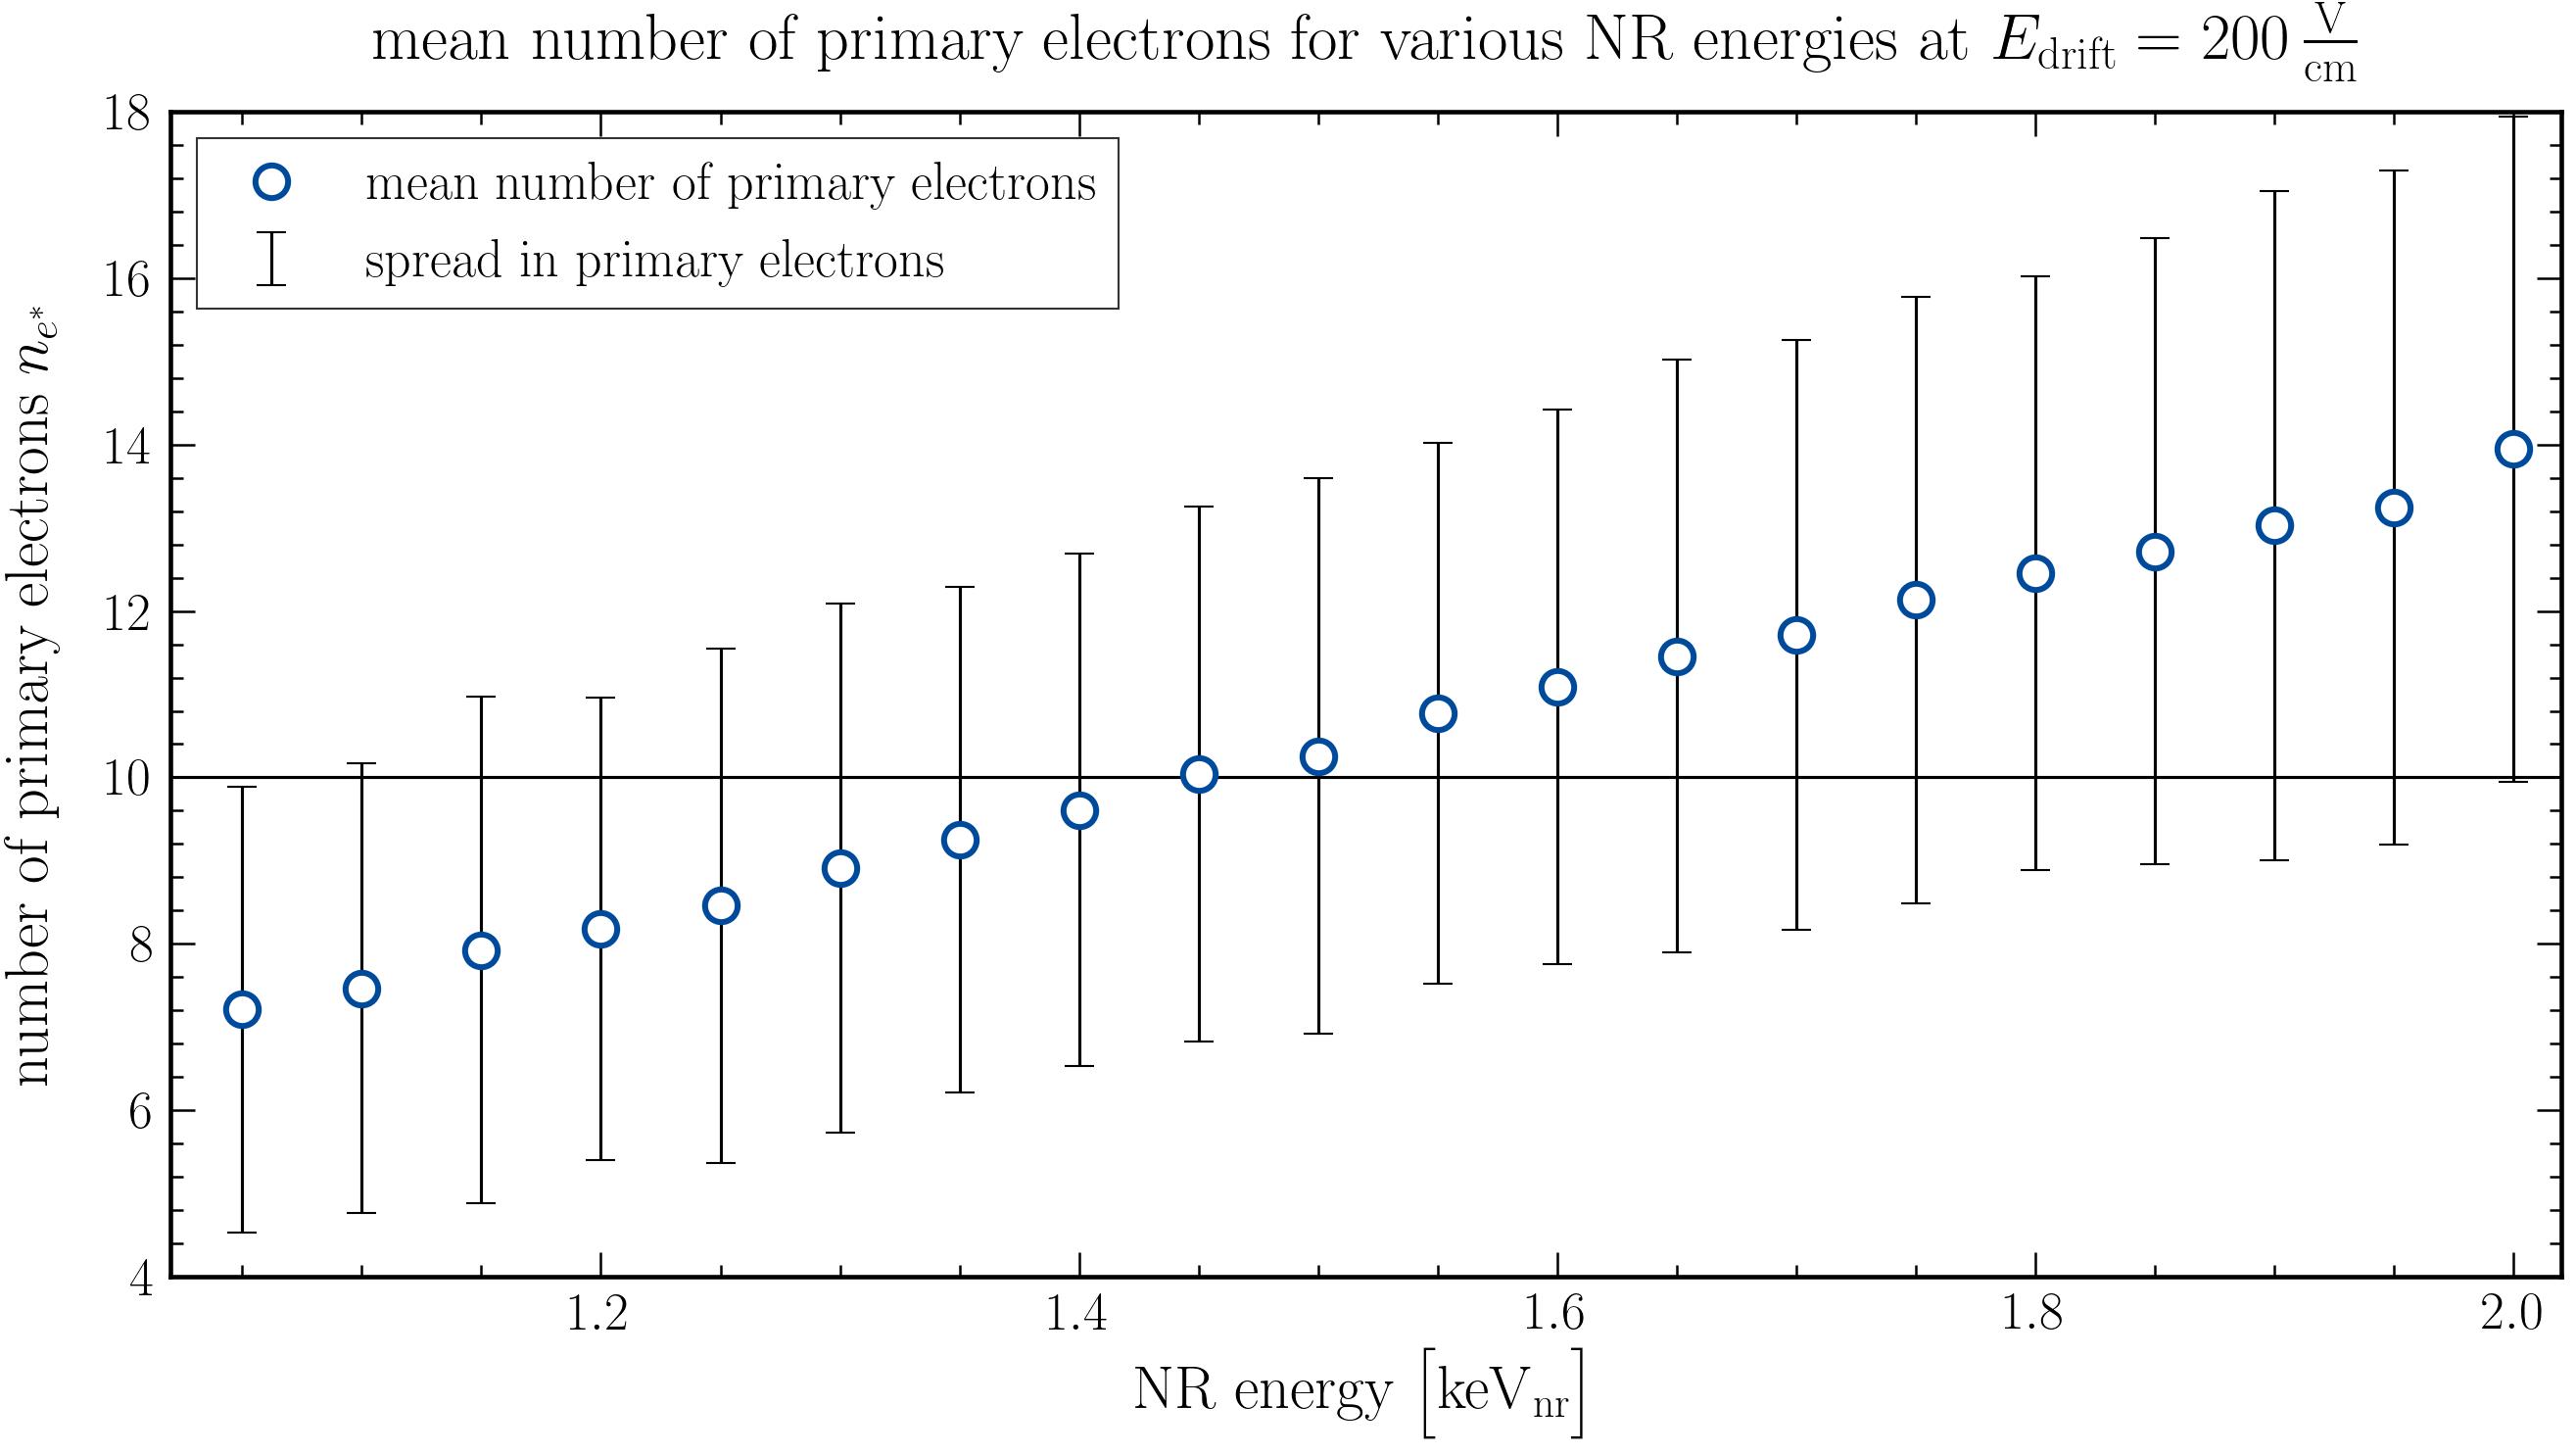

In [16]:

# loading the data and subdatasets and defining input parameters
data = SF.load_sf_ndarray("DetectorExample_XENON10__gnampfinos_julia_threshold_nr_between_1_and_2_keVnr.npy")
mask_list, datasubsets_list = SF.gen_subdatasets_from_gnampfino_data(data=data)
n_e_threshold = 10
e_field = 200
interaction_type = "NR"


# calculating stuff
energy_deposition_list = []
mean_number_of_electrons_list = []
spread_in_electrons_list = []
for i in range(len(mask_list)):
    counts, number_of_quanta = SF.get_histogram_data_from_primary_quanta_data(quanta_data=datasubsets_list[i]["number_of_electrons"])
    A, mu, sigma, sA, smu, ssigma = SF.fit_gaussian_to_histogram_data(counts=counts, number_of_quanta=number_of_quanta)
    energy_deposition_list.append(mask_list[i][1])
    mean_number_of_electrons_list.append(mu)
    spread_in_electrons_list.append(sigma)
    print("################################################")
    print(f"data from subset: {mask_list[i][0]}, {mask_list[i][1]}, {mask_list[i][2]}")
    print(f"mean number of primary electrons: {mu}")
    print(f"spread in primary electrons: {np.sqrt(sigma**2)}")
    #print(f"primary photons: {n_p}")


# plotting
fig, ax1 = plt.subplots(figsize=(21, 10.5), dpi=150)
# plotting data
p1 = ax1.plot(energy_deposition_list, mean_number_of_electrons_list, color=darwin_blue, linewidth=5, linestyle='', label='mean number of primary electrons', markersize=16, marker='o', markerfacecolor='w', markeredgewidth=2.9, markeredgecolor=darwin_blue)
p2 = ax1.errorbar(x=energy_deposition_list, y=mean_number_of_electrons_list, yerr=spread_in_electrons_list, xerr=None, fmt='', ecolor="black", elinewidth=None, capsize=7, linestyle='', label='spread in primary electrons')
# ticks
ax1.tick_params(axis='both')
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.2)
ax1.tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
ax1.tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
# tick labels
ax1.tick_params(axis="x", labelsize=26, pad=8)
ax1.tick_params(axis="y", labelsize=26, pad=8)
# axes range
ax1.set_xlim([1.02,2.02])
ax1.set_ylim([4,18])
# x and y label
#ax1.set_xlabel("ER energy", fontsize=30, labelpad=4)
ax1.set_xlabel("NR energy $\\big[ \\mathrm{keV}_{\\mathrm{nr}} \\big]$", fontsize=30, labelpad=4)
ax1.set_ylabel("number of primary electrons $n_{e^{*}}$",fontsize=30, labelpad = 18)
# lines
ax1.hlines(y=10, xmin=np.min(energy_deposition_list)-100, xmax=np.max(energy_deposition_list)+100, colors='black', linestyles='-', label='')
# text
#plt.text(x=3700, y=4500, s="$100\,\mathrm{keV}$", color="blue", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
# title
plt.title("mean number of primary electrons for various NR energies at $E_{\\mathrm{drift}}=200\,\\mathrm{\\frac{V}{cm}}$", fontsize=32, pad=15)
# legend
#ps = p1 +p2
#lbls = [l.get_label() for l in ps]
#ax1.legend(ps, lbls, loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)
ax1.legend(loc='upper left', fontsize=26, frameon=True, shadow=False, edgecolor='black', fancybox=False)
# saving
plt.show()
fig.savefig(path_output_psf +"primary_electrons_threshold_" +f"{interaction_type}" +"_at_" +f"{e_field}" +"Vcm"  +".png")


## 1.4 S1S2 Ellipse (for Robin)

[1334 1567 1914 ... 2096 1785 1965]
[1730 1497 1277 ... 1098 1450 1087]


/home/db1086/.local/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


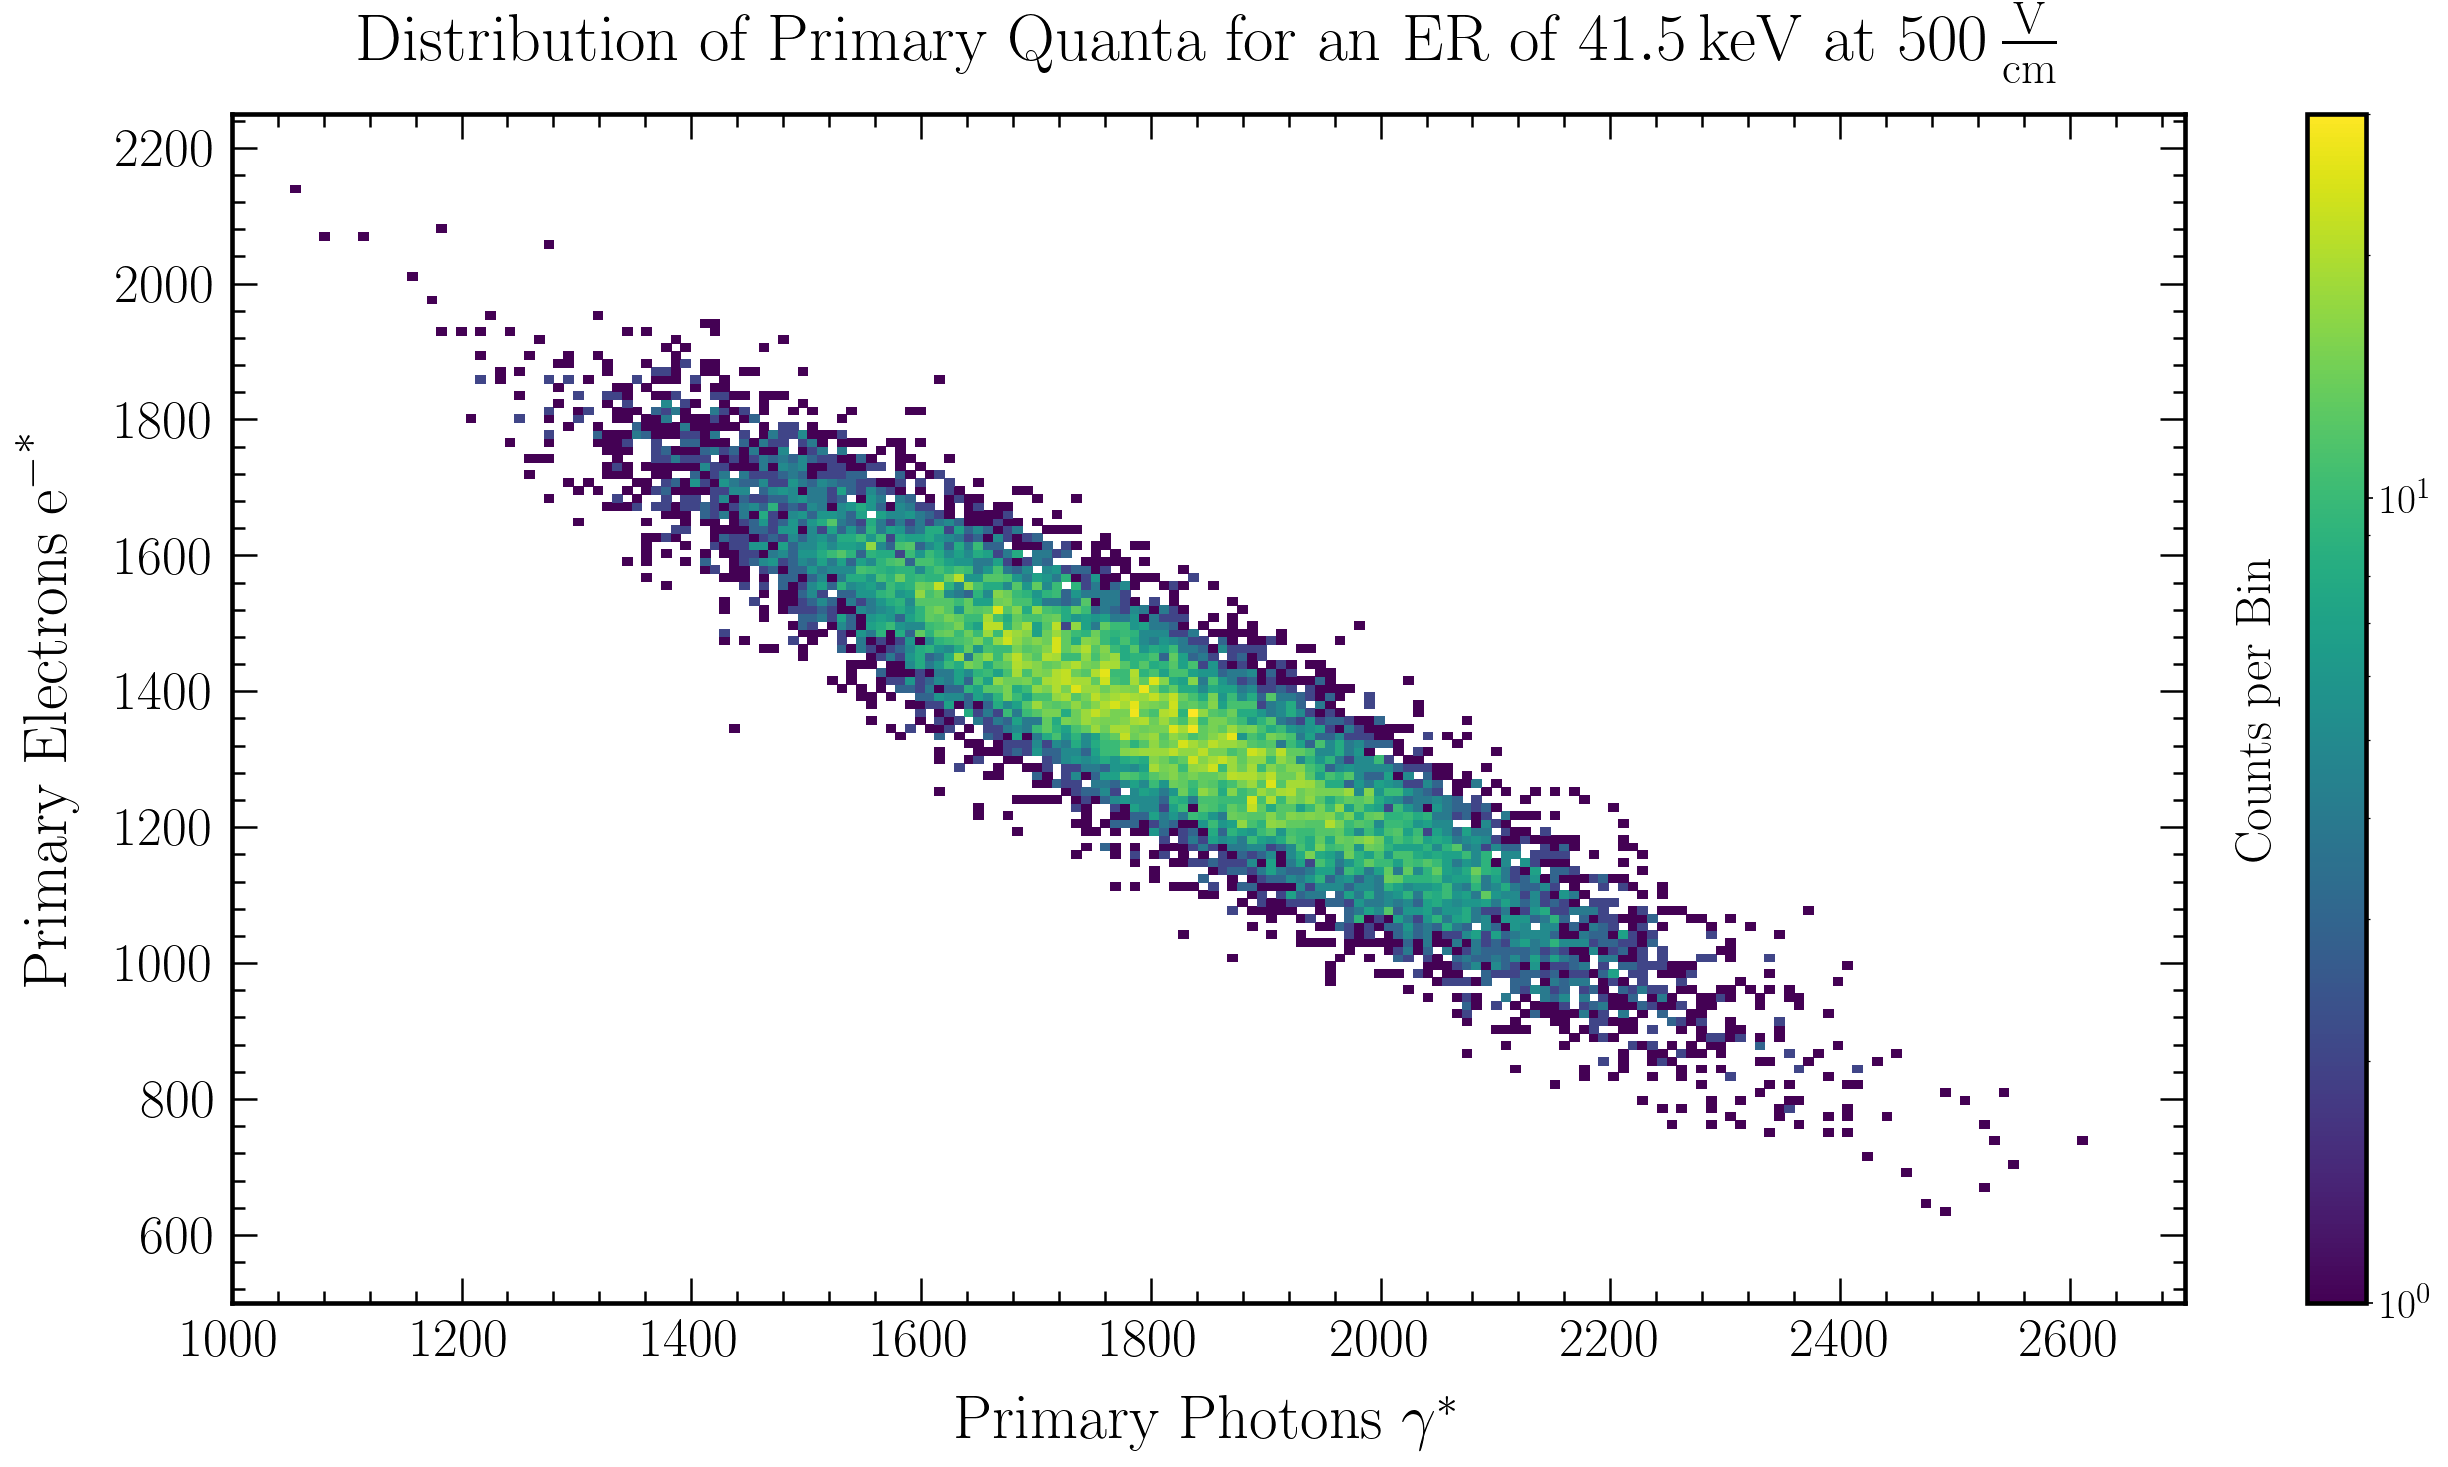

(<Figure size 3150x1575 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07a39d6ba8>)

In [43]:
from matplotlib.colors import LogNorm

# loading the data
data = SF.load_sf_ndarray("DetectorExample_XENON10__gnampfinos_robin_41keV_Ellipse")

def hist_2d(file, savename, savefolder="./output_psf/"):
    # plotting
    fig, ax1 = plt.subplots(figsize=(21, 10.5), dpi=150)

    plt.hist2d(file["number_of_photons"], file["number_of_electrons"], bins=[200,150], range=[[1000,2700],[500,2250]], cmin=1, norm=LogNorm(), cmap=plt.cm.viridis)
    # ticks
    ax1.tick_params(axis='both')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(2.2)
    ax1.tick_params(which='minor', direction='in', labelsize=20, top=True, right=True, width=1.2, length=6)
    ax1.tick_params(which='major', direction='in', labelsize=20, top=True, right=True, width=1.2, length=12)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
    # tick labels
    ax1.tick_params(axis="x", labelsize=26, pad=8)
    ax1.tick_params(axis="y", labelsize=26, pad=8)
    # axes range
    #ax1.set_xlim([250,1000])
    #ax1.set_ylim([0,32])
    # x and y label
    ax1.set_xlabel("Primary Photons $\gamma^{*}$", fontsize=30, labelpad=14)
    ax1.set_ylabel("Primary Electrons $\mathrm{e^-}^{*}$",fontsize=30, labelpad = 18)
    # text
    #plt.text(x=3700, y=4500, s="$100\,\mathrm{keV}$", color="blue", fontsize=27, verticalalignment='bottom', horizontalalignment='left', zorder=2)
    # Colorbar
    cbar = plt.colorbar() #label="Counts") #, fontsize=28)
    cbar.set_label(label="Counts per Bin", fontsize=24, labelpad=-95)
    cbar.outline.set_linewidth(2.2)
    cbar.ax.tick_params(labelsize=20)
    # title
    plt.title("Distribution of Primary Quanta for an ER of $41.5\,\\mathrm{keV}$ at $500\,\\mathrm{\\frac{V}{cm}}$", fontsize=32, pad=15)
    plt.show()
    # saving
    fig.savefig(savefolder +savename +".png")
    return fig, ax1

print(data["number_of_photons"])
print(data["number_of_electrons"])

hist_2d(file=data, savename="20200116__41keV_ellipse_for_Robin")

## 1.5 WIMP Recoil Spectra

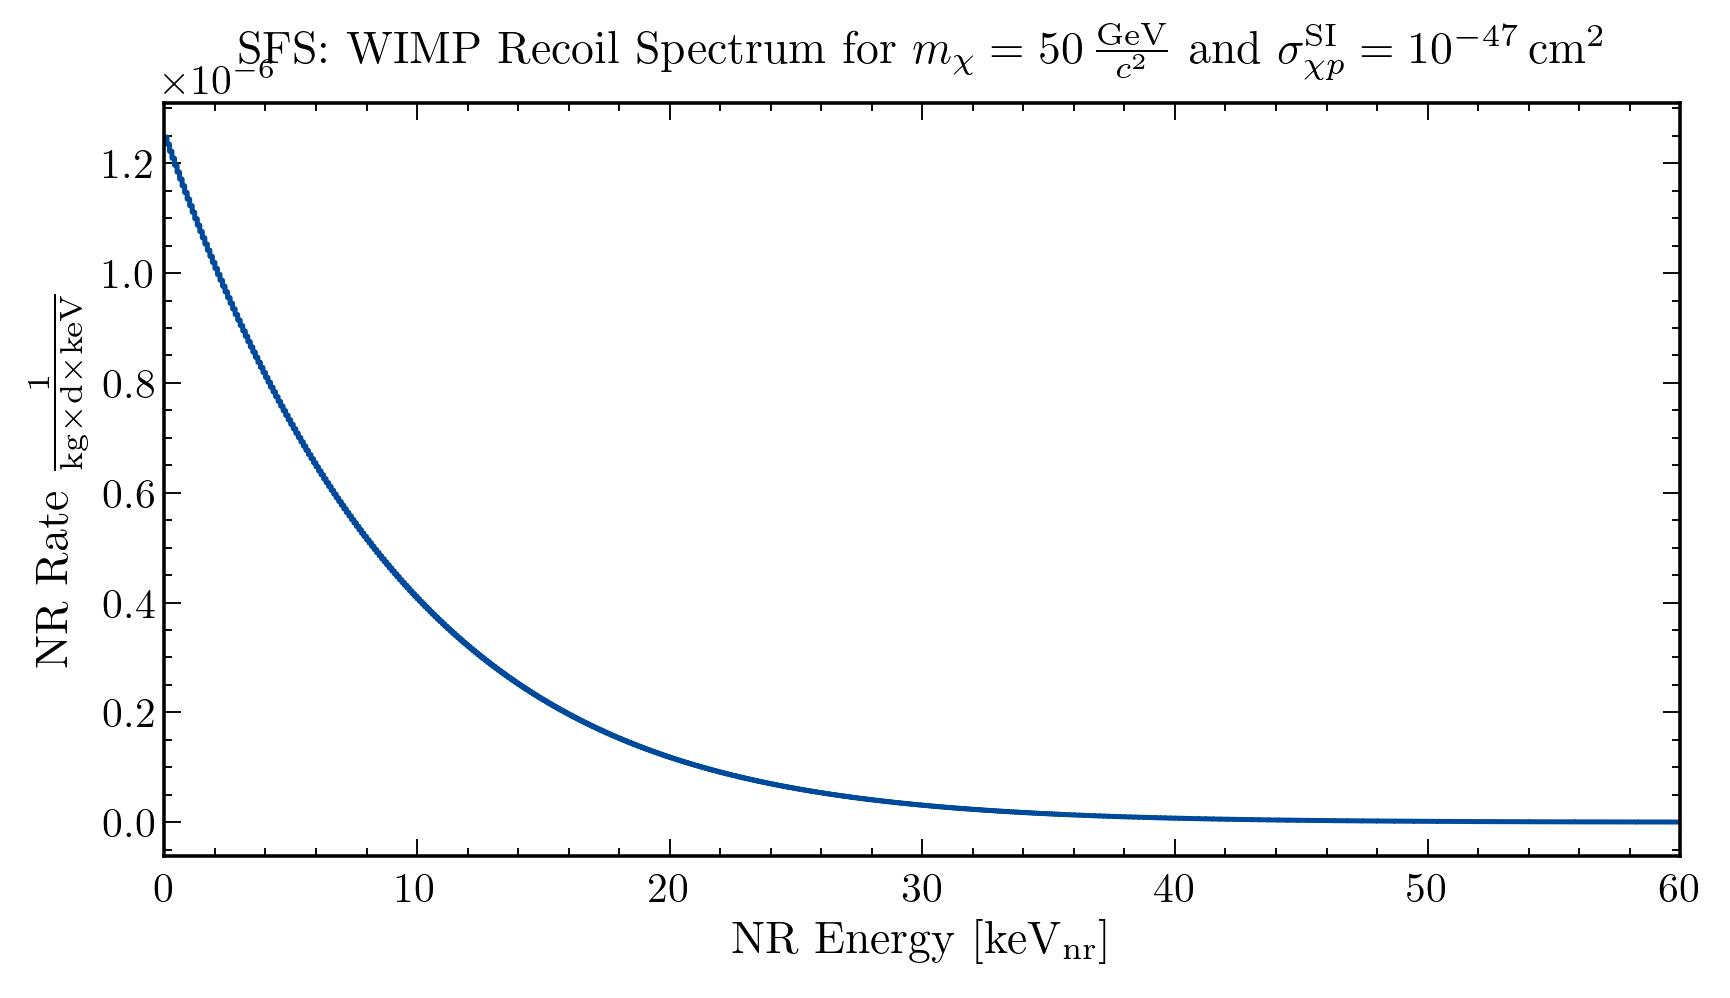

In [32]:
flag_executethiscell = False


if flag_executethiscell == True:


    ### retrieve data
    SF.gen_wimp_recoil_spectrum(mass=50.0, crosssection=1e-47)
    with open("./input_spectra/wimp_recoil_spectrum_histdata.json") as f:
        wimprecoilhist = json.load(f)
    bincenters = []
    counts = []
    for i in range(len(wimprecoilhist)):
        bincenters.append(wimprecoilhist[i][0])
        counts.append(wimprecoilhist[i][1])
    bincenters_stepized, counts_stepized = SF.stepize_histogram_data(bincenters=bincenters, counts=counts)

    
    ### plotting the WIMP histogram
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    plt.plot(bincenters_stepized, counts_stepized, c=darwin_blue, alpha=1.00)
    ax1.set_xlim([0.0,60])
    ax1.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))
    ax1.set_xlabel("NR Energy $\\big[\mathrm{keV}_{\mathrm{nr}}\\big]$")
    ax1.set_ylabel("NR Rate $\\frac{1}{\mathrm{kg}\\times\mathrm{d}\\times\mathrm{keV}}$")
    plt.title("SFS: WIMP Recoil Spectrum for $m_{\chi}=50\,\\frac{\mathrm{GeV}}{c^2}$ and $\sigma^{\mathrm{SI}}_{\chi p}=10^{-47}\,\mathrm{cm^{2}}$")
    plt.show()    
    fig.savefig("./wimp_recoil_spectrum_50_1e-47")
    plt.close(fig)

## 1.6 Reproducing NEST Benchmark Plots for Fabian

### NEST Benchmarks

Depicted below are the NEST benchmark plots for the electron model [--> taken from here <--](http://nest.physics.ucdavis.edu/benchmark-plots).
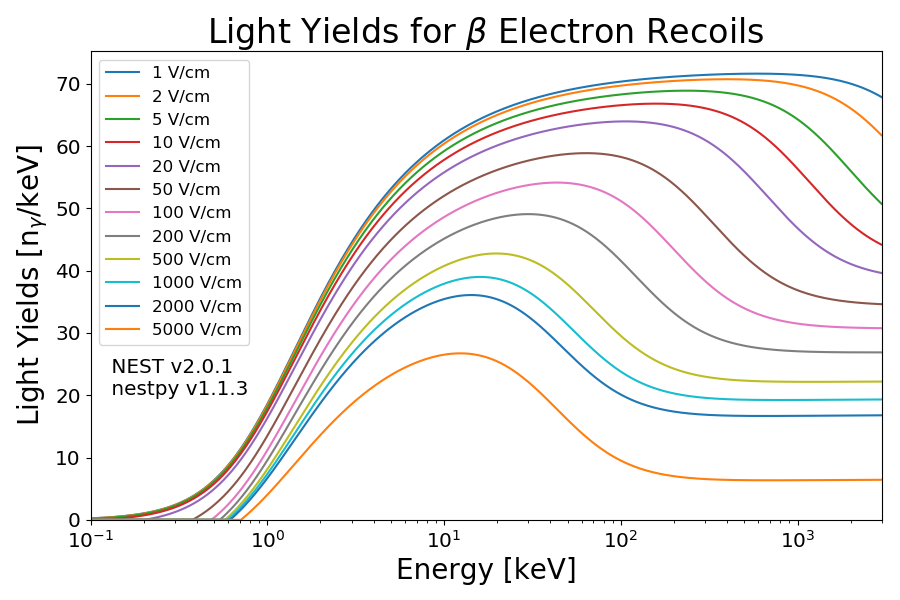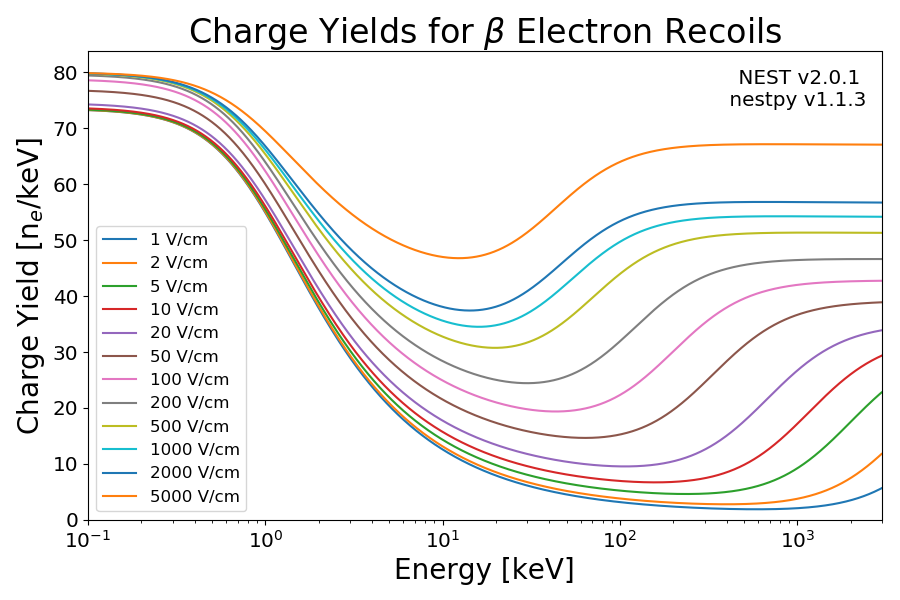


### Generating and Processing the Data

In [4]:
spectrumname = "gnampfinos_benchmark_test_for_fabian"
detectorname = "dummydetector"
raw_data_string = "20200212__" +spectrumname +"__" +detectorname +".npy"
processed_data_string = raw_data_string[:-4] +"__PROCESSED.npy"

In [ ]:
flag_executethiscell = False


if flag_executethiscell == True:
    
    ### generating data
    noe = 1000
    it = ["ER"]
    edep = np.logspace(start=-1, stop=3, num=50, endpoint=True)
    edep = np.append(edep, [1100., 1200., 1400., 1500., 2000., 2150., 2400., 2650., 3000.])
    edrift = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
    # generating the spectrum from the data defined above
    SF_spectrum.gen_gnampfino_parametersweep(name=spectrumname, savefolder="./input_spectra/", number_of_samples_per_run=noe, paramrange_interactiontype=it, paramrange_energydeposition=edep, paramrange_edrift=edrift)
    # generating and loading the NEST data
    SF_nestcom.SF_nestcom_runnest(path_inputspectrum=path_input_spectra, spectrumname=spectrumname, detectorname=detectorname, path_testnest=path_testnest, path_output=path_output_sf)
    raw_data = np.load(path_output_sf +raw_data_string)
    # processing the data
    SF_process.gen_summarized_ndarray(input_folder=path_output_sf, ndarray=raw_data_string, output_folder=path_output_psf)

### Plotting

In [10]:
flag_executethiscell = False


if flag_executethiscell == True:

    ### defining stuff
    data = np.load(path_output_psf +processed_data_string)
    drift_field_list = data["field_strength"][(data["energy_deposition"]==0.1)]
    colors = [
        "blue", # 1 V/cm
        "orange", # 2 V/cm
        "green", # 5 V/cm
        "red", # 10 V/cm
        "purple", # 20 V/cm
        "brown", # 50 V/cm
        "pink", # 100 V/cm
        "grey", # 200 V/cm
        "chartreuse", # 500 V/cm
        "cyan", # 1000 V/cm
        "blue", # 2000 V/cm
        "orange" # 5000 V/cm
    ]


    ### plotting the light yield
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        light_yield = np.divide(data["mean_number_of_photons"][(data["field_strength"]==drift_field_list[i])], data["energy_deposition"][(data["field_strength"]==drift_field_list[i])])
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], light_yield, c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_ylim([0,75])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("Light Yield $\\big[\\frac{\mathrm{n}_{\gamma^{*}}}{\mathrm{keV}_{\mathrm{ee}}}\\big]$")
    plt.title("Light Yield for $\\beta$ Electron Recoils for Various Drift Fields")
    leg = plt.legend(fontsize=8, labelspacing=0.3)#bbox_to_anchor=(0.03,0.15)
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"light_yield_for_betas")
    plt.close(fig)


    ### plotting the charge yield
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        charge_yield = np.divide(data["mean_number_of_electrons"][(data["field_strength"]==drift_field_list[i])], data["energy_deposition"][(data["field_strength"]==drift_field_list[i])])
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], charge_yield, c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("Charge Yield $\\big[\\frac{\mathrm{n}_{e^{*}}}{\mathrm{keV}_{\mathrm{ee}}}\\big]$")
    plt.title("Charge Yield for $\\beta$ Electron Recoils for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0, bbox_to_anchor=(0.18,0.8))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"charge_yield_for_betas")
    plt.close(fig)


    ### plotting the mean number of photons
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], data["mean_number_of_photons"][(data["field_strength"]==drift_field_list[i])], c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    #ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("Mean Number of Primary Photons")
    plt.title("Mean Number of Primary Photons for $\\beta$ Electron Recoils")# for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0.5)#, bbox_to_anchor=(0.18,0.2))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"mean_number_of_primary_photons")
    plt.close(fig)


    ### plotting the mean number of photons
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], data["mean_number_of_electrons"][(data["field_strength"]==drift_field_list[i])], c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    #ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("Mean Number of Primary Electrons")
    plt.title("Mean Number of Primary Electrons for $\\beta$ Electron Recoils")# for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0.5)#, bbox_to_anchor=(0.18,0.2))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"mean_number_of_primary_electrons")
    plt.close(fig)


    ### plotting the rms number of photons
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], data["rms_number_of_photons"][(data["field_strength"]==drift_field_list[i])], c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    #ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("RMS Number of Primary Photons")
    plt.title("RMS Number of Primary Photons for $\\beta$ Electron Recoils")# for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0.5)#, bbox_to_anchor=(0.18,0.2))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"rms_number_of_primary_photons")
    plt.close(fig)


    ### plotting the rms number of electrons
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], data["rms_number_of_electrons"][(data["field_strength"]==drift_field_list[i])], c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    #ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("RMS Number of Primary Electrons")
    plt.title("RMS Number of Primary Electrons for $\\beta$ Electron Recoils")# for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0.5)#, bbox_to_anchor=(0.18,0.2))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"rms_number_of_primary_electrons")
    plt.close(fig)
    

    ### plotting the ratio of rms over mean for photons
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        ratio = np.divide(data["rms_number_of_photons"][(data["field_strength"]==drift_field_list[i])], data["mean_number_of_photons"][(data["field_strength"]==drift_field_list[i])])
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], ratio, c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    #ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("RMS over Mean for Primary Photons")
    plt.title("RMS over Mean for Primary Photons from $\\beta$ Electron Recoils")# for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0.5)#, bbox_to_anchor=(0.18,0.2))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"rms_over_mean_for_primary_photons")
    plt.close(fig)


    ### plotting the ratio of rms over mean for electrons
    fig, ax1 = plt.subplots(figsize=(5.670, 3.189), dpi=300)
    for i in range(len(drift_field_list)):
        ratio = np.divide(data["rms_number_of_electrons"][(data["field_strength"]==drift_field_list[i])], data["mean_number_of_electrons"][(data["field_strength"]==drift_field_list[i])])
        plt.plot(data["energy_deposition"][(data["field_strength"]==drift_field_list[i])], ratio, c=colors[i], alpha=1.00, label=f"{drift_field_list[i]:.0f}" +" $\\frac{\mathrm{V}}{\mathrm{cm}}$")
    ax1.set_xlim([0.1,3000])
    ax1.set_xscale("log")
    #ax1.set_yscale("log")
    #ax1.set_ylim([0,85])
    ax1.set_xlabel("ER Energy $\\big[\mathrm{keV}_{\mathrm{ee}}\\big]$")
    ax1.set_ylabel("RMS over Mean for Primary Electrons")
    plt.title("RMS over Mean for Primary Electrons from $\\beta$ Electron Recoils")# for Various Drift Fields")
    leg = plt.legend(fontsize=7, labelspacing=0.3, borderaxespad=0.5)#, bbox_to_anchor=(0.18,0.2))
    plt.show()    
    fig.savefig(path_output_psf +SF_nestcom.datestring() +"__" +"rms_over_mean_for_primary_electrons")
    plt.close(fig)
    
    